In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import matplotlib to show plots inline.
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os

import astropy.units as u
import matplotlib as mpl
import sys 
sys.path.append("..")
from plot_OpSims import plot_OpSims_hist_extremes

In [3]:
# import maf python modules
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as metricBundles

In [4]:
# import convenience functions
import sys 
sys.path.append("../../LSST_OpSim")
from Scripts_NBs.opsimUtils import *

## Load the results
We first load the results of the run into memory.

In [5]:
NSIDE = 64
your_username = "rjassef"
folder_mafoutput = "DDFs_EM5_depths_{0:d}".format(NSIDE)
resultDbPath = '/home/idies/workspace/Storage/{0}/persistent/MAFOutput/{1}'.format(
    your_username, folder_mafoutput)
metricDataPath = '/home/idies/workspace/Storage/{0}/persistent/MAFOutput/{1}/MetricData/'.format(
    your_username, folder_mafoutput)

In [6]:
# get a dictionary of resultDb from given directory
resultDbs = getResultsDbs(resultDbPath)

In [7]:
# retrieve metricBundles for each opsim run and store them in a dictionary
bundleDicts_raw = dict()
for runName in resultDbs:
    bundleDicts_raw[runName] = bundleDictFromDisk(resultDbs[runName], runName, metricDataPath)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSID

In [8]:
dbRuns = list(bundleDicts_raw.keys())
print(bundleDicts_raw[dbRuns[0]].keys())
#print(bundleDicts_raw[dbRuns[1]].keys())

dict_keys([(1, 'ExgalM5_with_cuts_AGN_ECDFS_u'), (2, 'ExgalM5_with_cuts_AGN_XMM-LSS_g'), (3, 'ExgalM5_with_cuts_AGN_ECDFS_g'), (4, 'ExgalM5_with_cuts_AGN_AllDDFs_u'), (5, 'ExgalM5_with_cuts_AGN_AllDDFs_g'), (6, 'ExgalM5_with_cuts_AGN_COSMOS_u'), (7, 'ExgalM5_with_cuts_AGN_ELAISS1_u'), (8, 'ExgalM5_with_cuts_AGN_EDFS_u'), (9, 'ExgalM5_with_cuts_AGN_XMM-LSS_u'), (10, 'ExgalM5_with_cuts_AGN_COSMOS_g'), (11, 'ExgalM5_with_cuts_AGN_EDFS_g'), (12, 'ExgalM5_with_cuts_AGN_ELAISS1_g')])


In [9]:
#Make sure that the plots folder exists.
plots_folder = "plots_all_opsims_extremes_{0:d}".format(NSIDE)
if not os.path.exists(plots_folder):
    os.mkdir(plots_folder)

### Function to pull out a specific DDF from the bundleDicts 

In [10]:
def get_bundleDicts_use(filter, DDF_name, bundleDicts_raw):
    bundleDicts_use = dict()
    metricName = 'ExgalM5_with_cuts_AGN_{0}_{1}'.format(DDF_name, filter)
    Key = (1, metricName)
    for run in dbRuns:
        for raw_key in bundleDicts_raw[run].keys():
            if raw_key[1]==metricName:
                #mask = bundleDicts_raw[run][raw_key].metricValues.mask
                #data = bundleDicts_raw[run][raw_key].metricValues.data[~mask]
                #data = data[~(np.isnan(data) | np.isinf(data))]
                bundleDicts_use[run] = dict()
                bundleDicts_use[run][Key] = bundleDicts_raw[run][raw_key]
                break
    return Key, bundleDicts_use

### u-band 3 sigma 

In [11]:
def mlim_3sigma(mlim_5sigma):
    return mlim_5sigma + 2.5*np.log10(5./3.)

barebones_nexp2_v1.6_10yrs 26.78845702126506
ddf_heavy_v1.6_10yrs 28.09876828878882
barebones_nexp2_v1.6_10yrs 26.780999740328433
ddf_heavy_v1.6_10yrs 28.316801407607286
dm_heavy_nexp2_v1.6_10yrs 26.72749968991747
ddf_heavy_v1.6_10yrs 27.93756150912226
barebones_nexp2_v1.6_10yrs 26.781613848415112
ddf_heavy_v1.6_10yrs 27.936370282166877
footprint_4_v1.710yrs 26.92214445978002
ddf_heavy_v1.6_10yrs 28.161143944570874
ddf_dither2.00_v1.7_10yrs 26.589317205585527
ddf_heavy_v1.6_10yrs 28.206701520379504


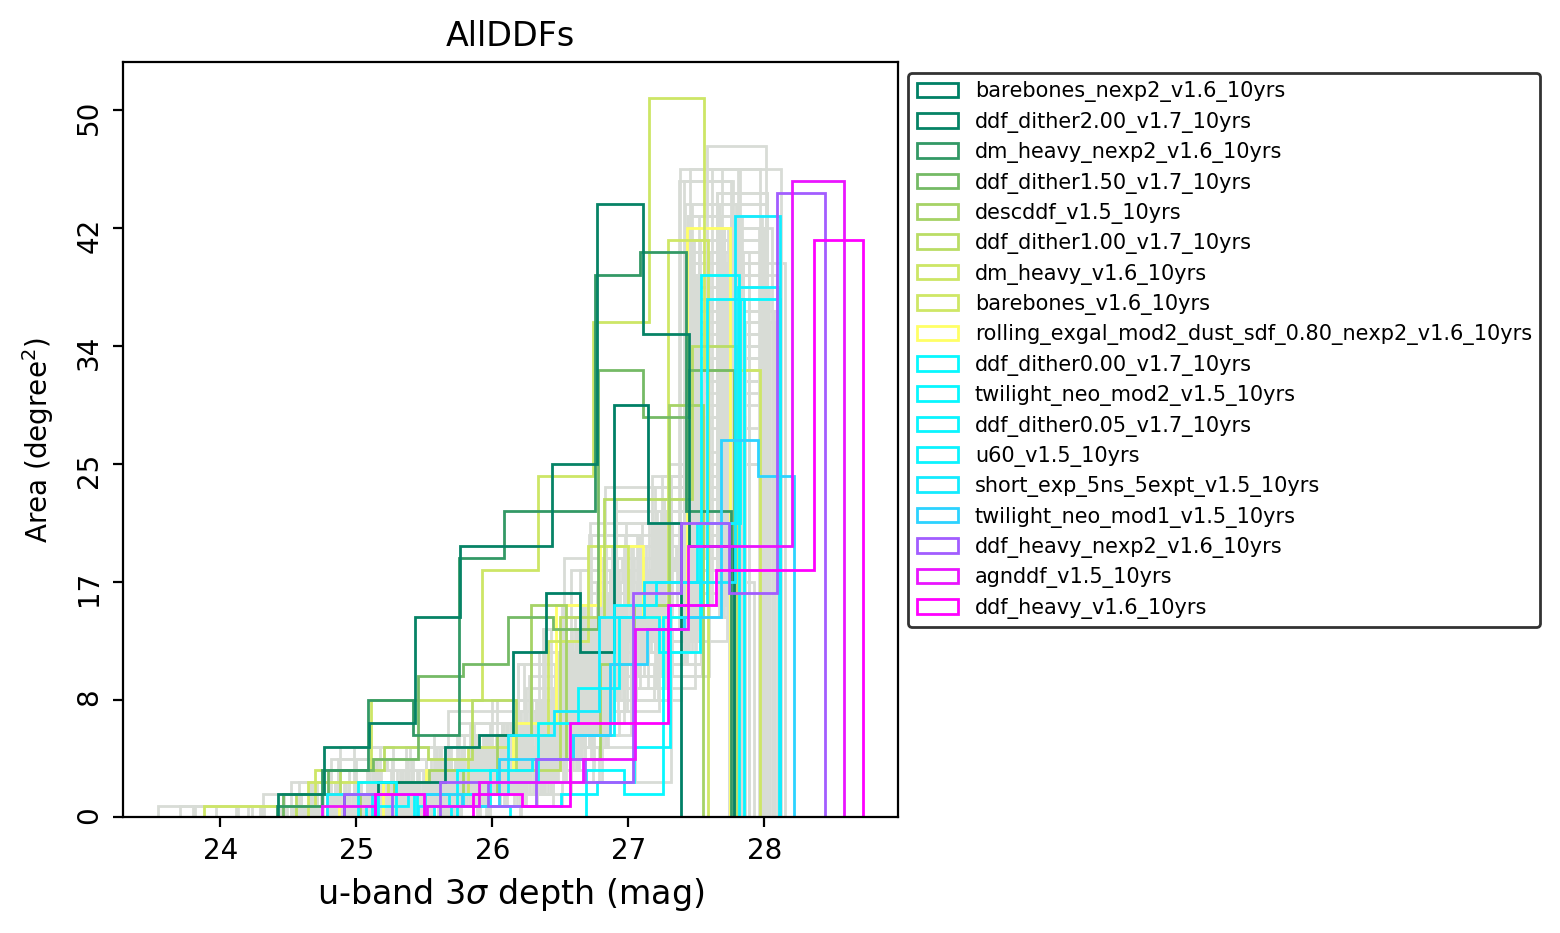

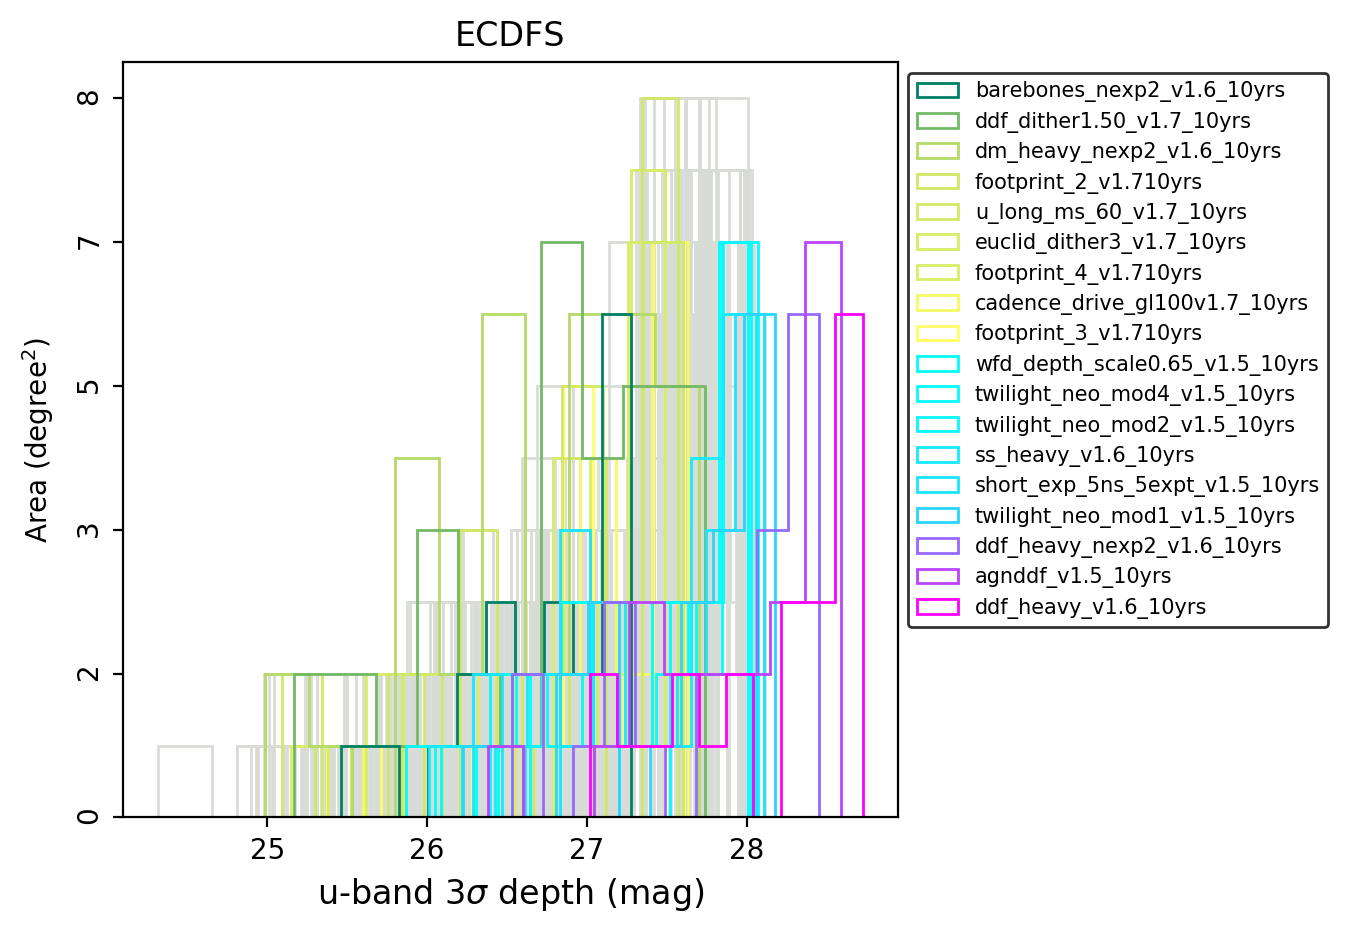

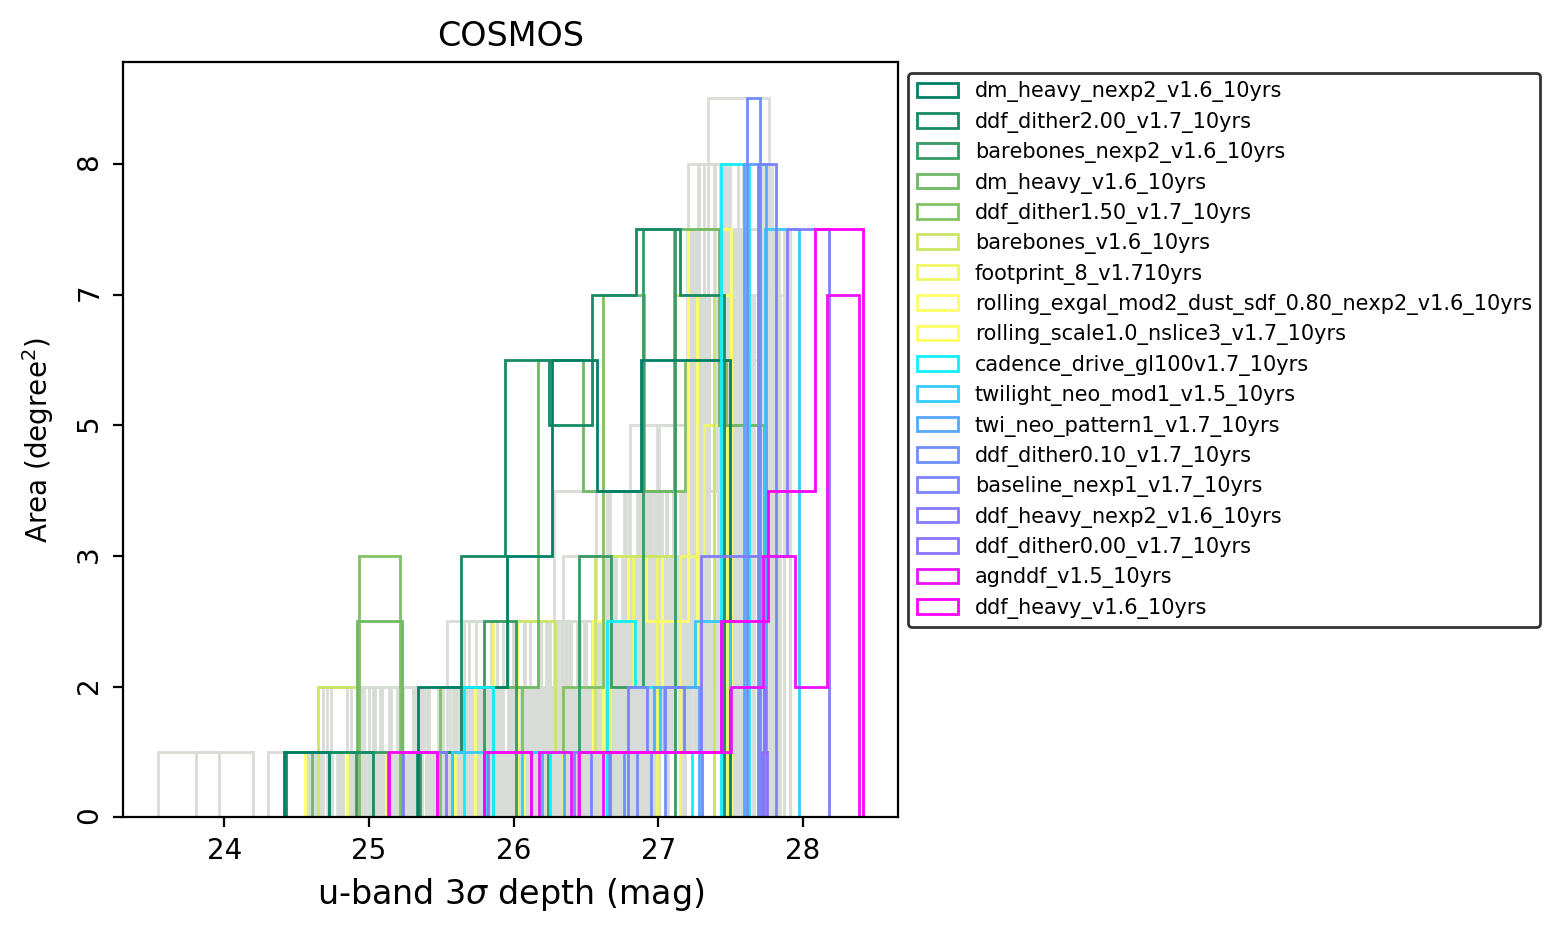

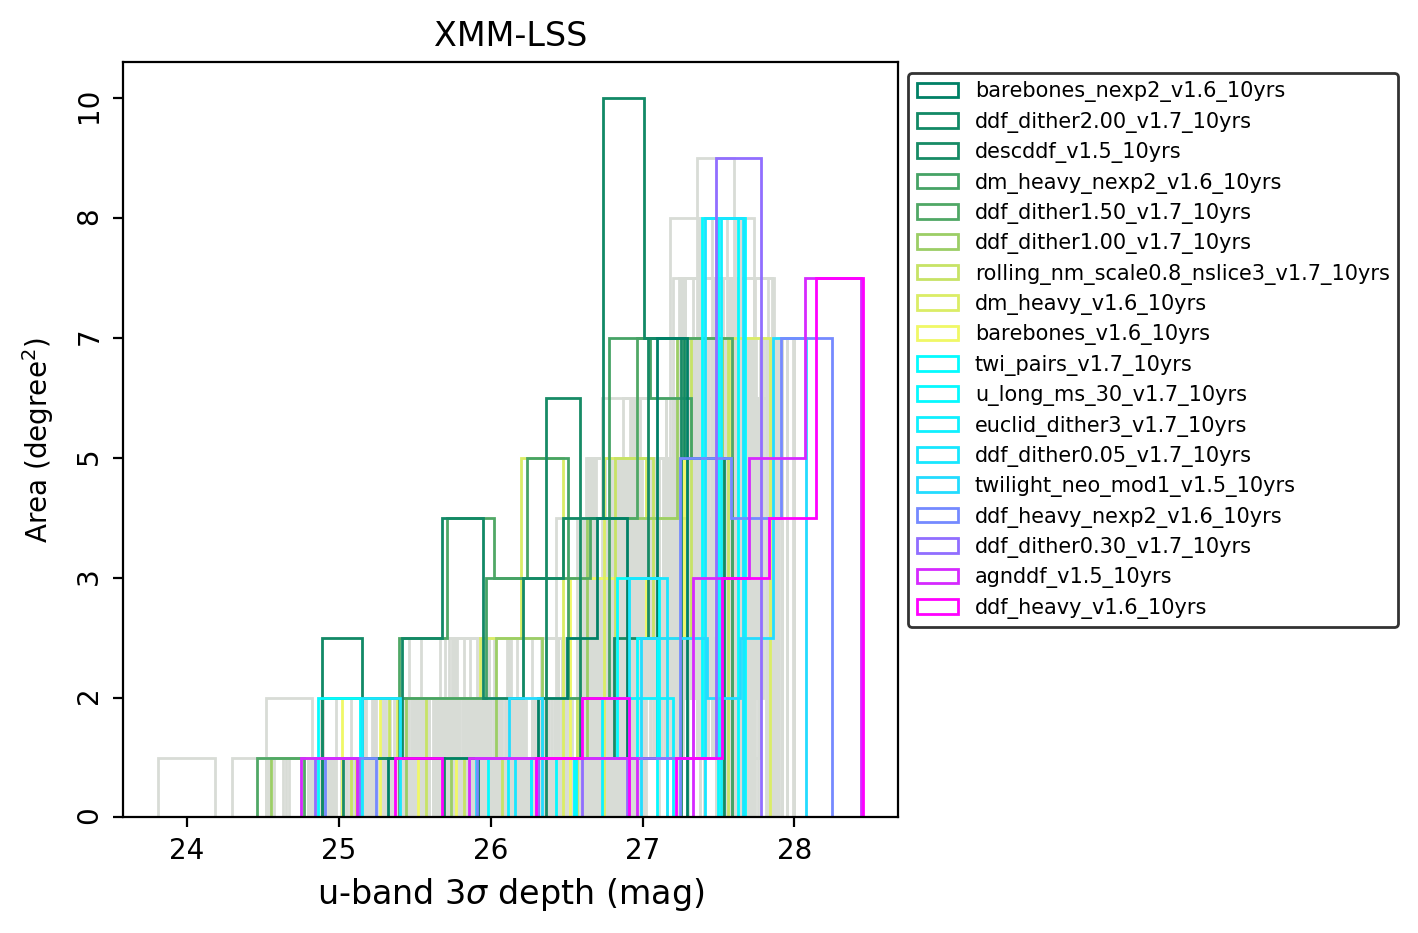

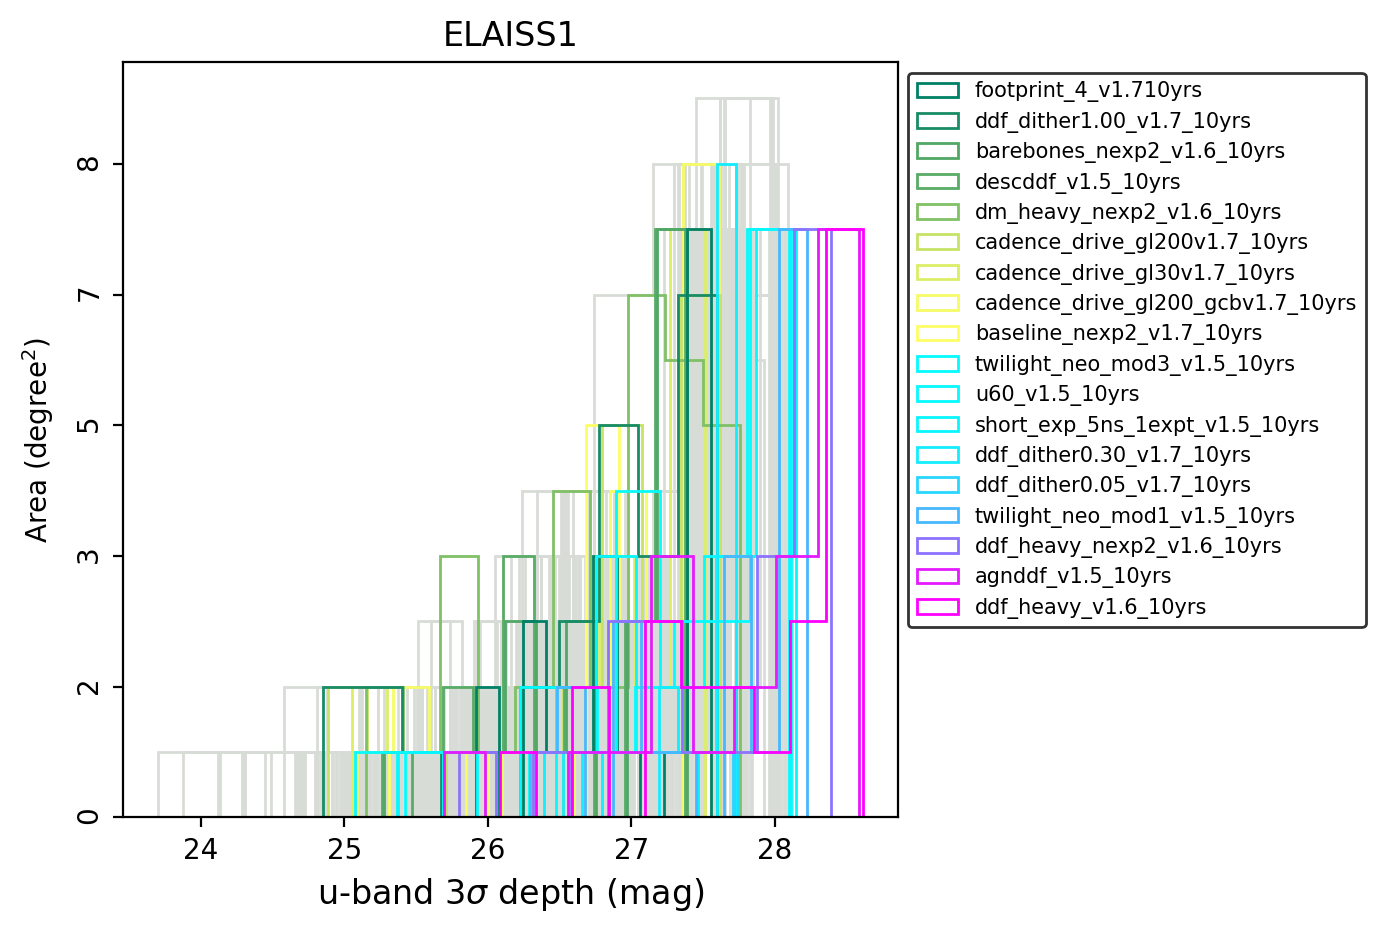

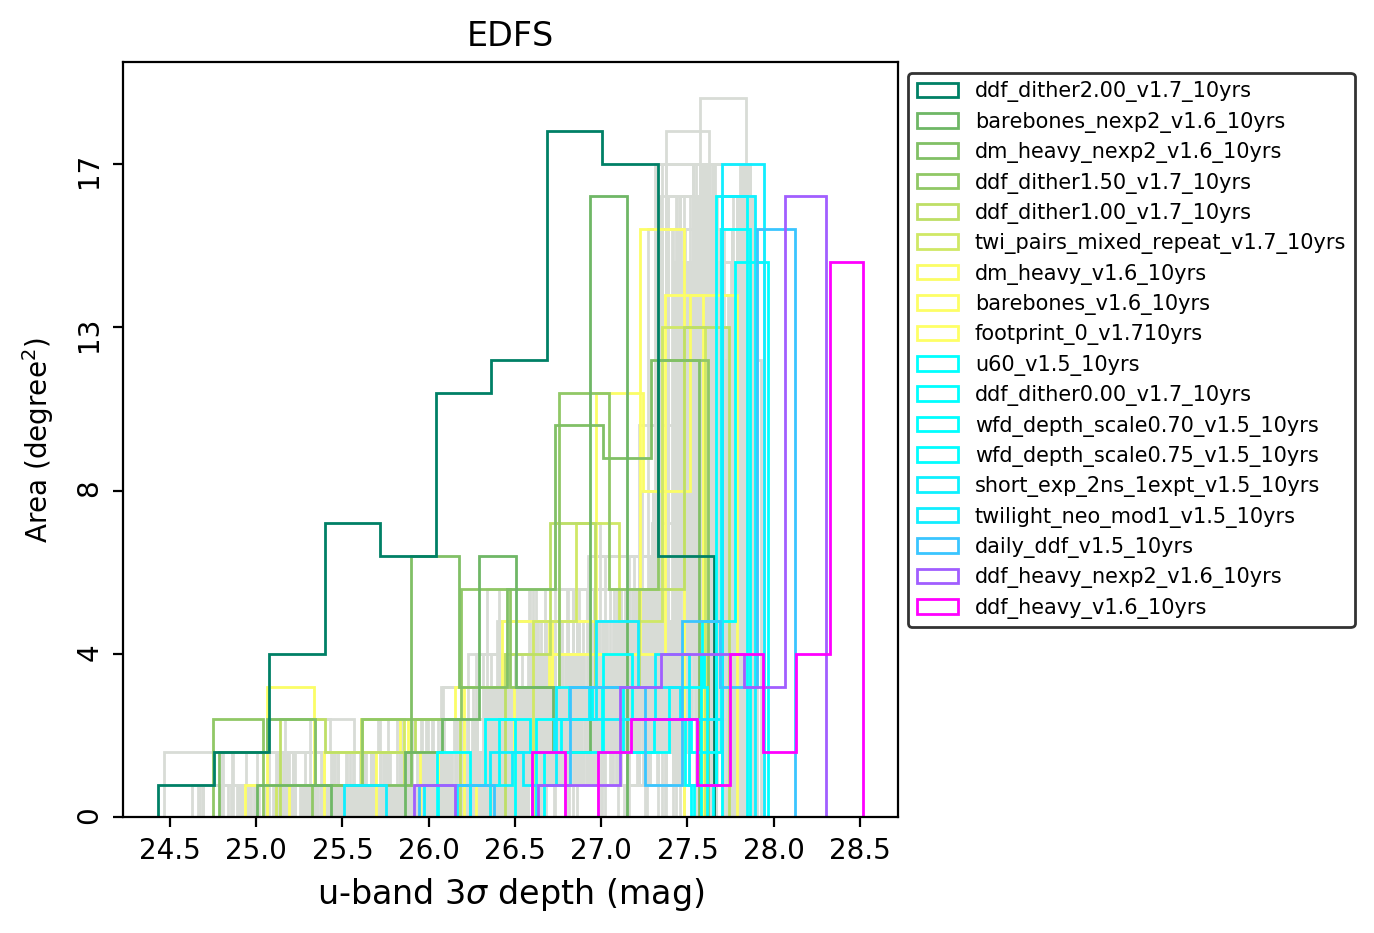

In [12]:
filter = "u"
#DDF = "AllDDFs"
DDFs = ['AllDDFs', 'ECDFS', 'COSMOS', 'XMM-LSS', 'ELAISS1', 'EDFS']

for DDF in DDFs:

    #Create the bundleDict appropriate for this DDF.
    Key = tuple()
    bundleDicts_use = dict()
    Key, bundleDicts_use = get_bundleDicts_use(filter, DDF, bundleDicts_raw)

    #Set here the useful parameters for the plot.
    data_func = mlim_3sigma
    xlabel = r"u-band 3$\sigma$ depth (mag)"
    title = DDF
    healpix_pixarea = bundleDicts_use[dbRuns[0]][Key].slicer.pixArea * u.sr

    #Make the plot
    plot_OpSims_hist_extremes(Key, bundleDicts_use, data_func=data_func, 
                              color_map_top=mpl.cm.cool, 
                              color_map_bottom=mpl.cm.summer, xlabel=xlabel, 
                              healpix_pixarea=healpix_pixarea, 
                              figsize=(5, 5), title=title, bins=10, 
                              percentile=5)
    #plot_OpSims_hist(Key, bundleDicts_use, data_func=data_func, figsize=(10,11), 
    #                 healpix_pixarea=healpix_pixarea, datamin=None, datamax=None, 
    #                 color_map=[mpl.cm.summer,mpl.cm.cool], xlabel=xlabel, title=title,
    #                 bins=10)

    #Save the plot.
    fname = "{0}/uband_3sigma_depth_{1}.png".format(plots_folder,DDF)
    plt.savefig(fname, dpi=200, bbox_inches='tight')

### g-band 5 sigma

agnddf_v1.5_10yrs 27.1800997746149
ddf_heavy_v1.6_10yrs 28.85738487002459
agnddf_v1.5_10yrs 27.327688158085913
ddf_heavy_v1.6_10yrs 29.067986226252046
agnddf_v1.5_10yrs 27.11991837641339
ddf_heavy_v1.6_10yrs 28.728810450690652
agnddf_v1.5_10yrs 26.963070312770437
ddf_heavy_v1.6_10yrs 28.699523589653563
agnddf_v1.5_10yrs 27.26254553363503
ddf_heavy_v1.6_10yrs 28.883517892136894
agnddf_v1.5_10yrs 27.26392543933794
ddf_heavy_v1.6_10yrs 28.931343450067153


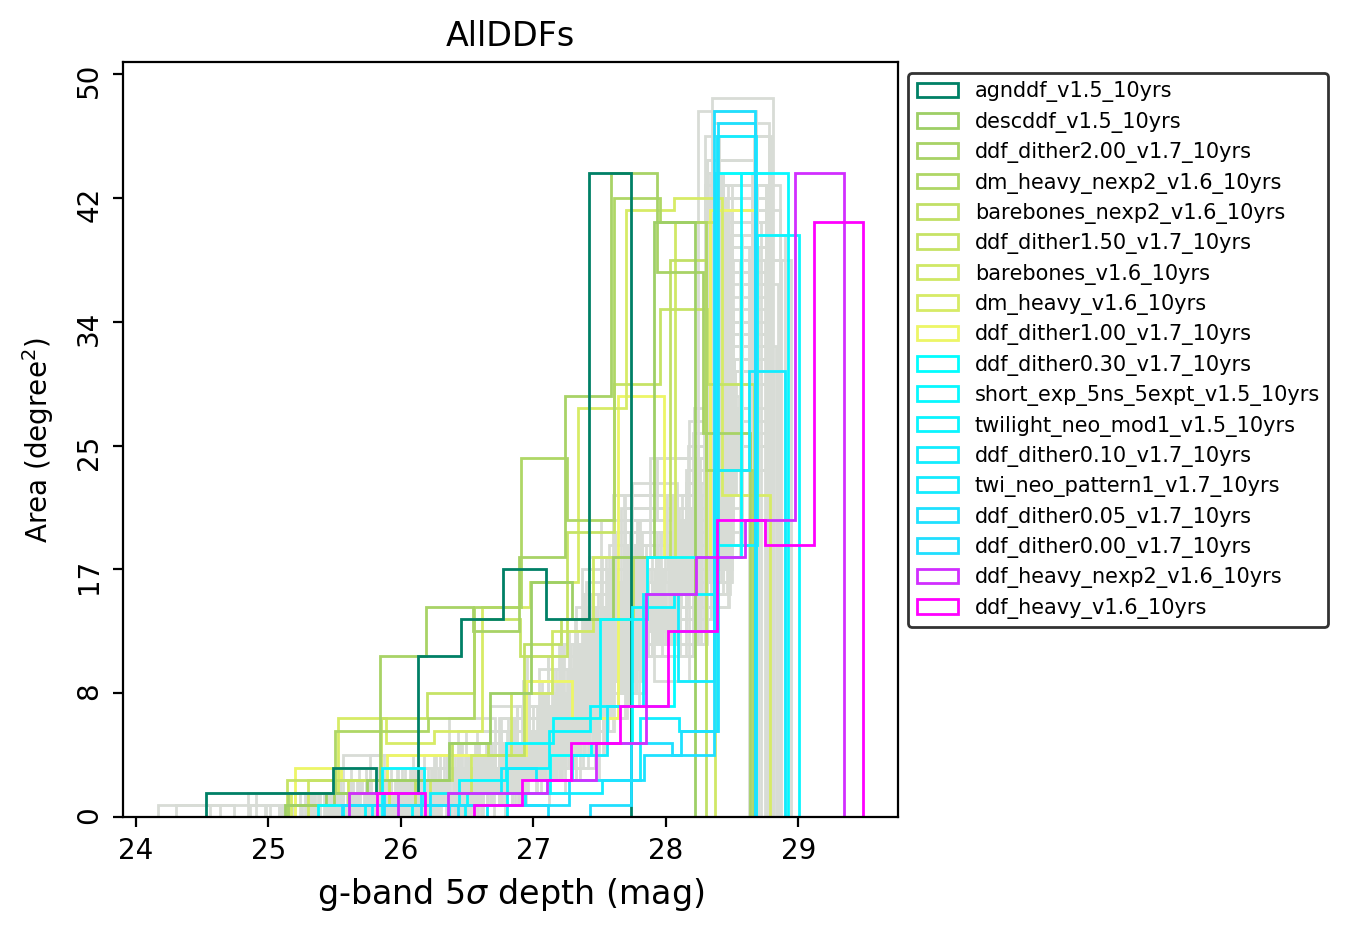

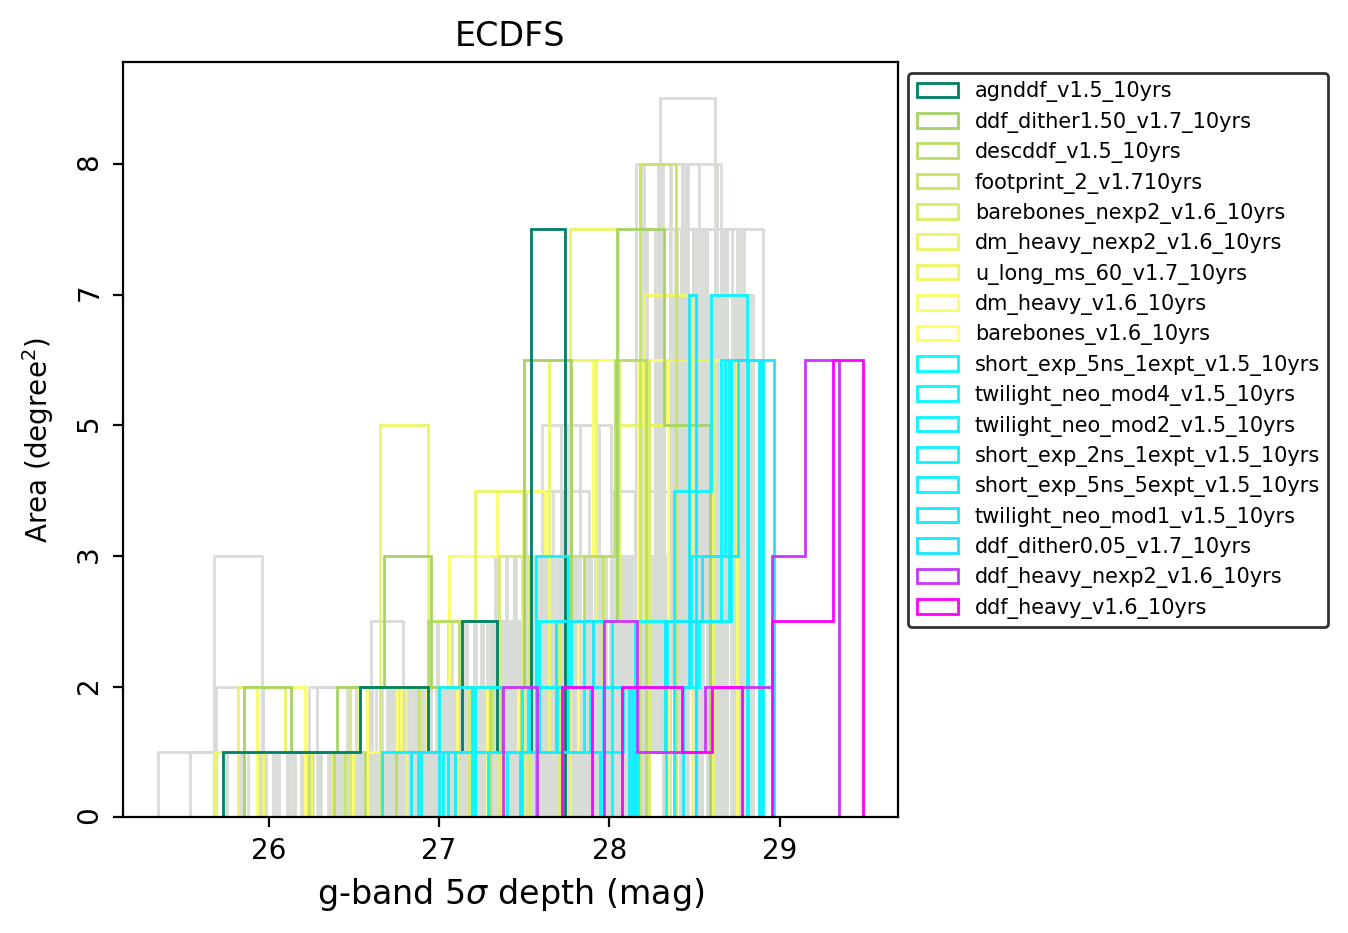

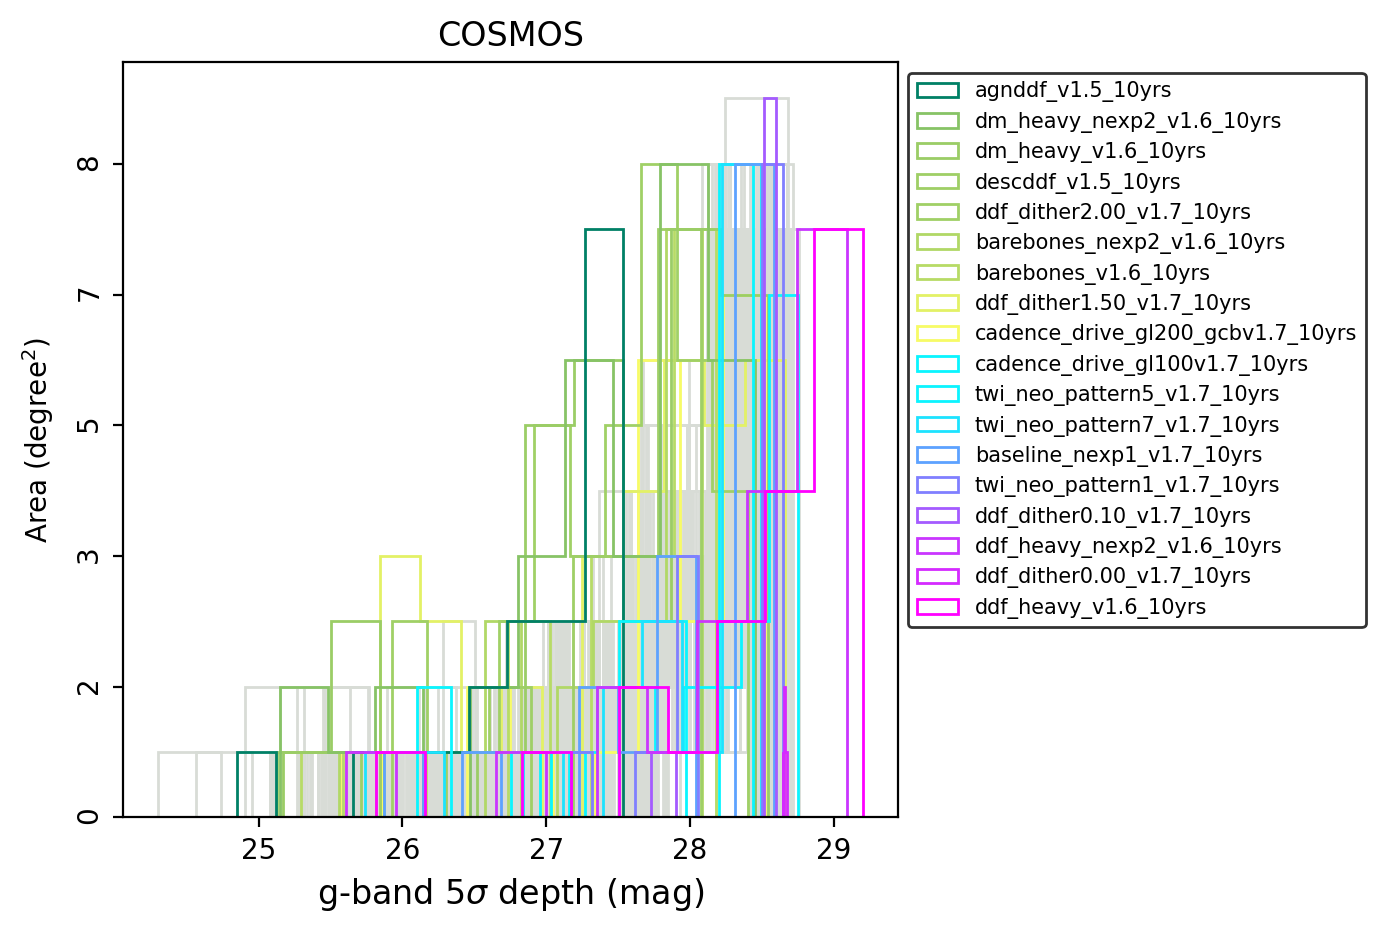

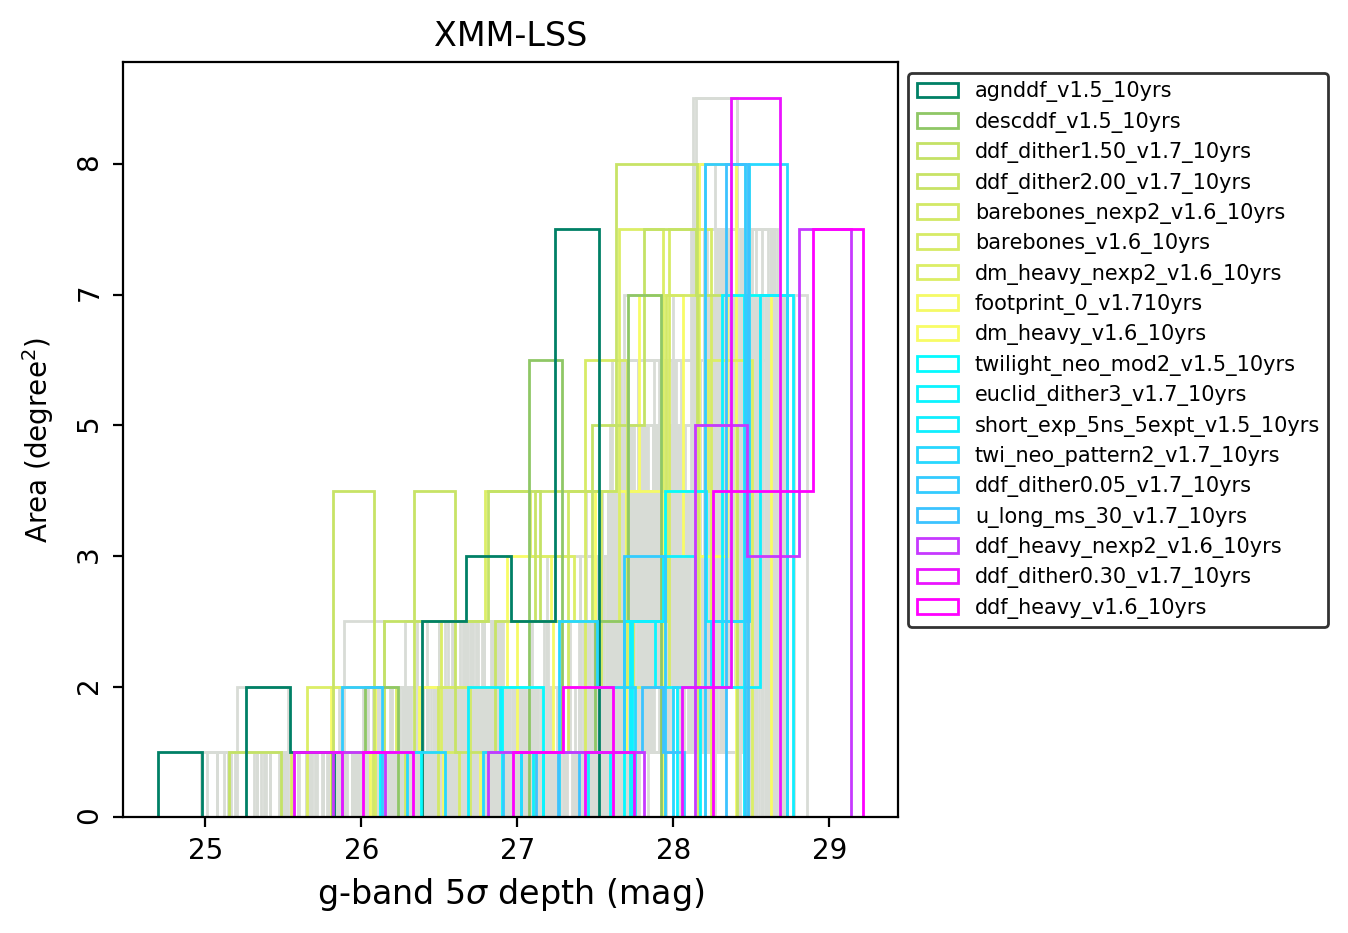

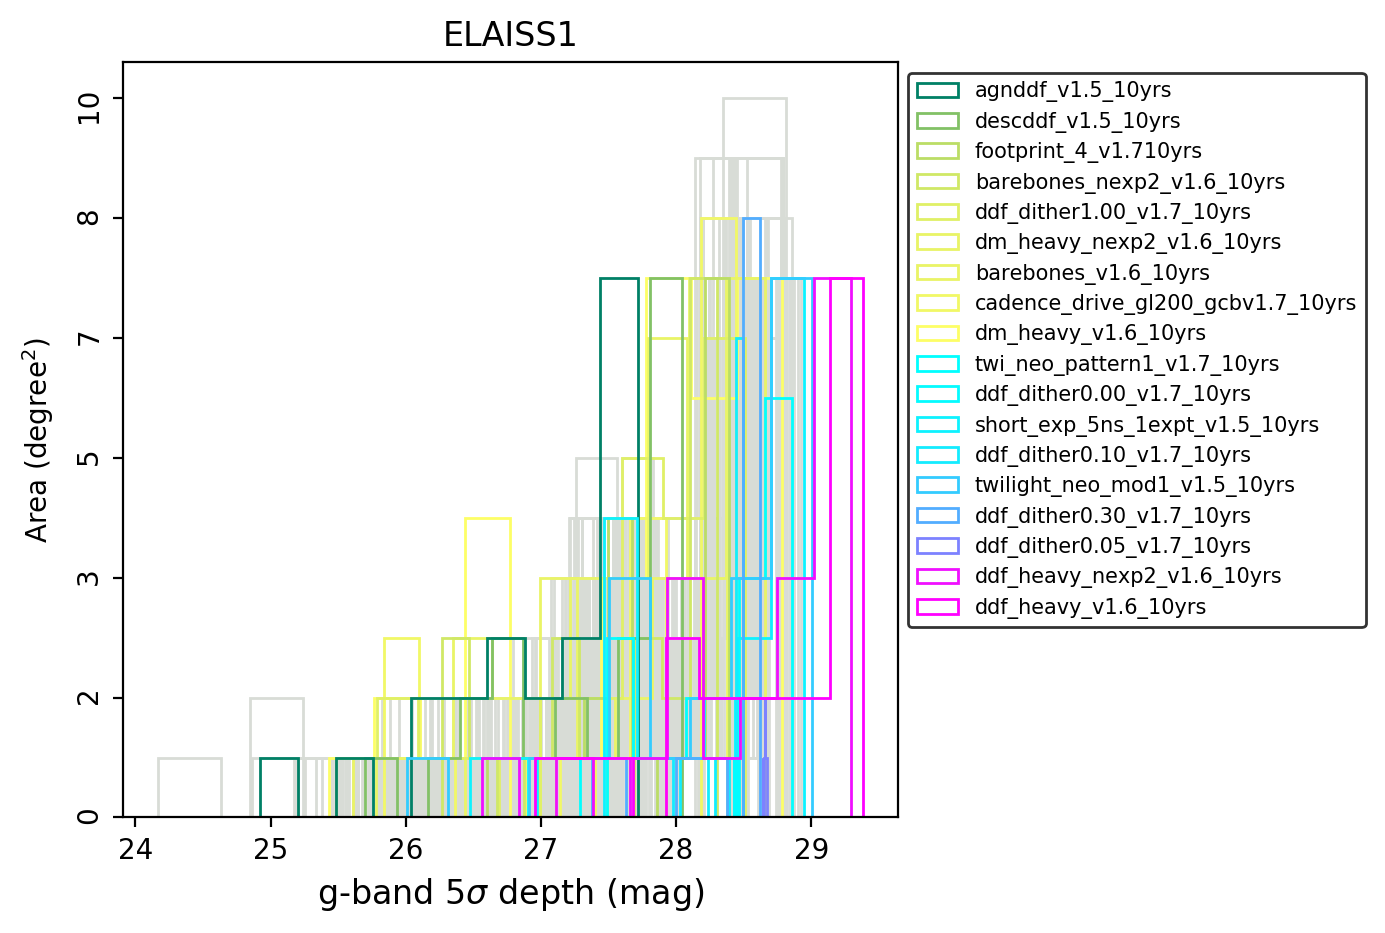

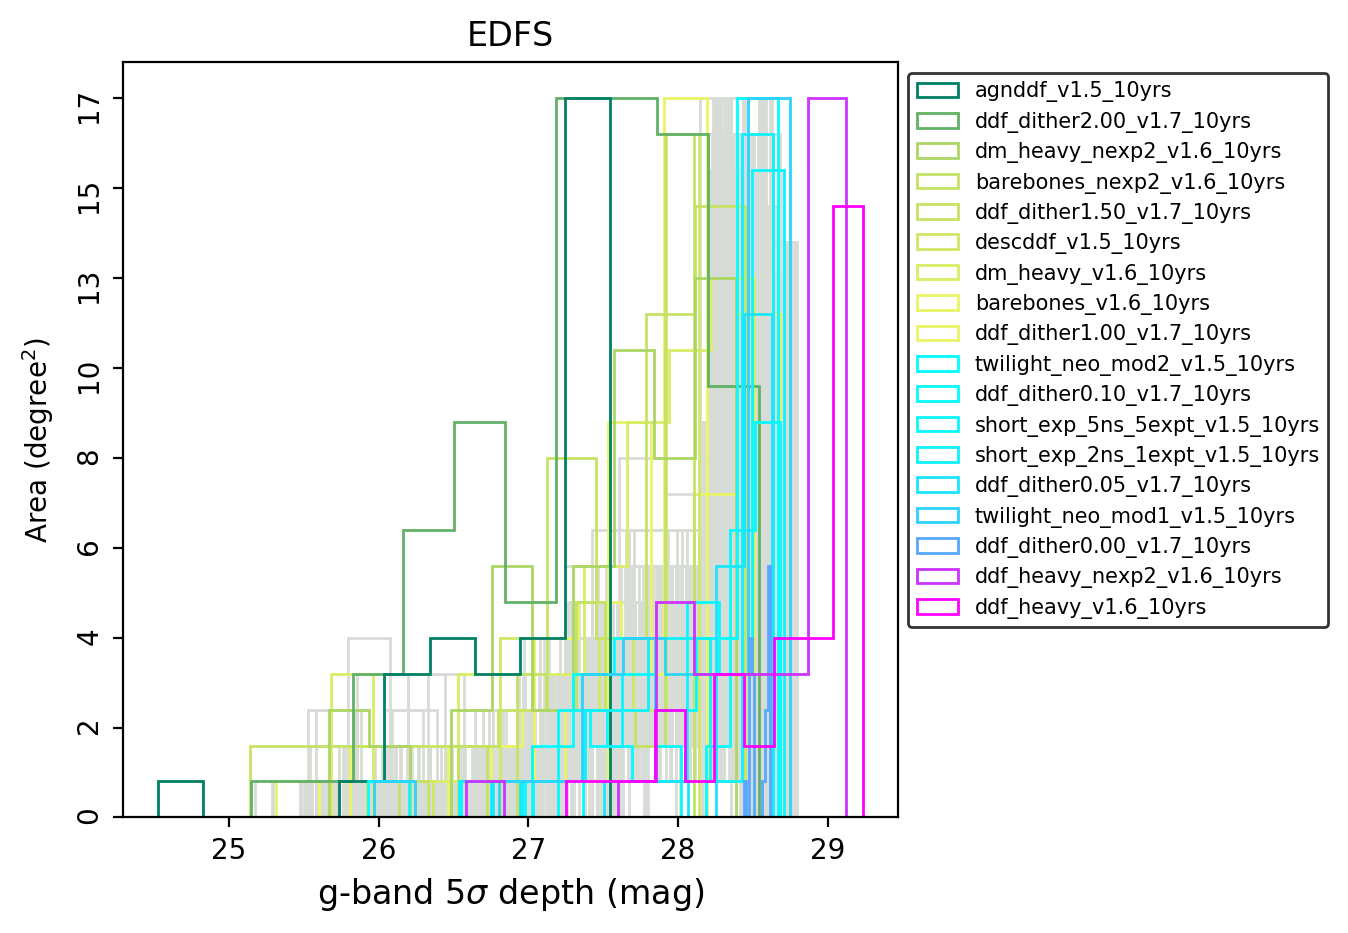

In [13]:
filter = "g"
#DDF = "AllDDFs"
DDFs = ['AllDDFs', 'ECDFS', 'COSMOS', 'XMM-LSS', 'ELAISS1', 'EDFS']

for DDF in DDFs:

    #Create the bundleDict appropriate for this DDF.
    Key = tuple()
    bundleDicts_use = dict()
    Key, bundleDicts_use = get_bundleDicts_use(filter, DDF, bundleDicts_raw)

    #Set here the useful parameters for the plot.
    data_func = None
    xlabel = r"g-band 5$\sigma$ depth (mag)"
    title = DDF
    healpix_pixarea = bundleDicts_use[dbRuns[0]][Key].slicer.pixArea * u.sr

    #Make the plot
    plot_OpSims_hist_extremes(Key, bundleDicts_use, data_func=data_func, 
                              color_map_top=mpl.cm.cool, 
                              color_map_bottom=mpl.cm.summer, xlabel=xlabel, 
                              healpix_pixarea=healpix_pixarea, 
                              figsize=(5, 5), title=title, bins=10, 
                              percentile=5)
    #plot_OpSims_hist(Key, bundleDicts_use, data_func=data_func, figsize=(10,11), 
    #                 healpix_pixarea=healpix_pixarea, datamin=None, datamax=None, 
    #                 color_map=[mpl.cm.summer,mpl.cm.cool], xlabel=xlabel, title=title, 
    #                 bins=10)

    #Save the plot.
    fname = "{0}/gband_3sigma_depth_{1}.png".format(plots_folder,DDF)
    plt.savefig(fname, dpi=200, bbox_inches='tight')

## Plot as a fuction of L* at z=2.5

In [14]:
#vanden Berk et al. (2001)
data = np.loadtxt("../mstar_estimates/mstar_z.vandenberk.dat")

#Assef et al. (2010)
#data = np.loadtxt("../mstar_estimates/mstar_z.lrt.dat")

mstar = dict()
filters = ['u','g','r','i','z','y']
for k, filter in enumerate(filters):
    mstar[filter] = np.interp([2.5], data[:,0], data[:,k+1])[0]
    print("{0:s} {1:7.3f}".format(filter, mstar[filter]))

u  21.009
g  20.161
r  20.040
i  20.024
z  19.853
y  19.634


### u-band 3-sigma

In [15]:
def log_QLF_Lstar_frac_u(mlim_5sigma):
    #First, transform to 3 sigma
    mlim_3sigma = mlim_5sigma + 2.5*np.log10(5./3.)
    #Now, transform to Lstar fraction.
    return -0.4*(mlim_3sigma - mstar['u'])

ddf_heavy_v1.6_10yrs -2.8360993155155274
barebones_nexp2_v1.6_10yrs -2.3119748085060245
ddf_heavy_v1.6_10yrs -2.9233125630429155
barebones_nexp2_v1.6_10yrs -2.3089918961313733
ddf_heavy_v1.6_10yrs -2.771616603648905
dm_heavy_nexp2_v1.6_10yrs -2.2875918759669873
ddf_heavy_v1.6_10yrs -2.7711401128667505
barebones_nexp2_v1.6_10yrs -2.3092375393660443
ddf_heavy_v1.6_10yrs -2.8610495778283496
footprint_4_v1.710yrs -2.365449783912008
ddf_heavy_v1.6_10yrs -2.879272608151801
ddf_dither2.00_v1.7_10yrs -2.2323188822342104


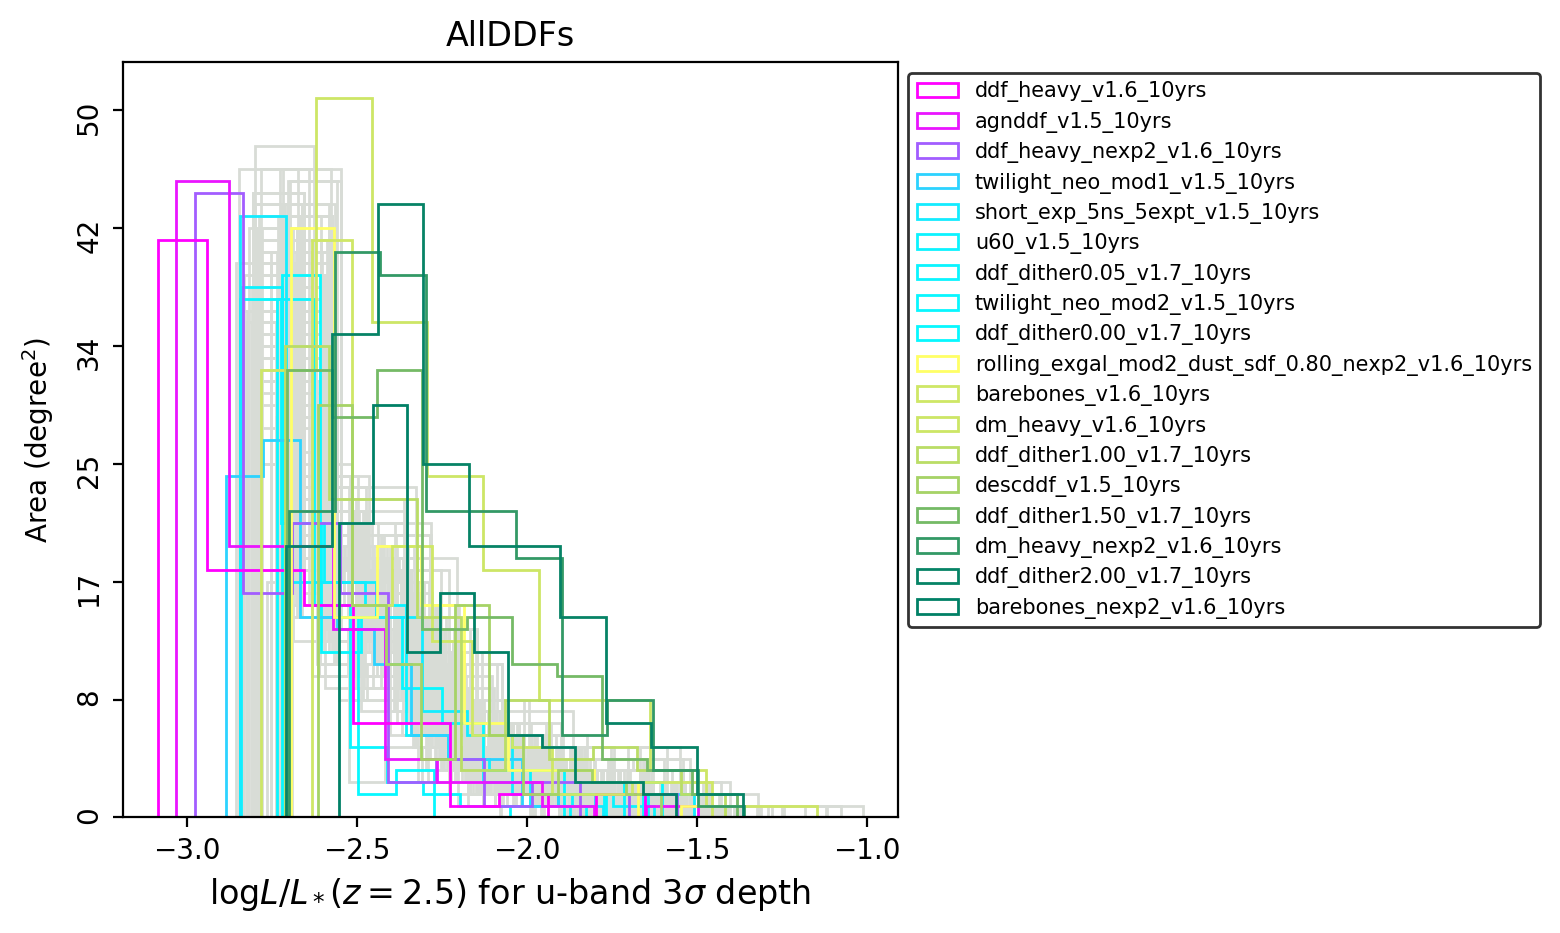

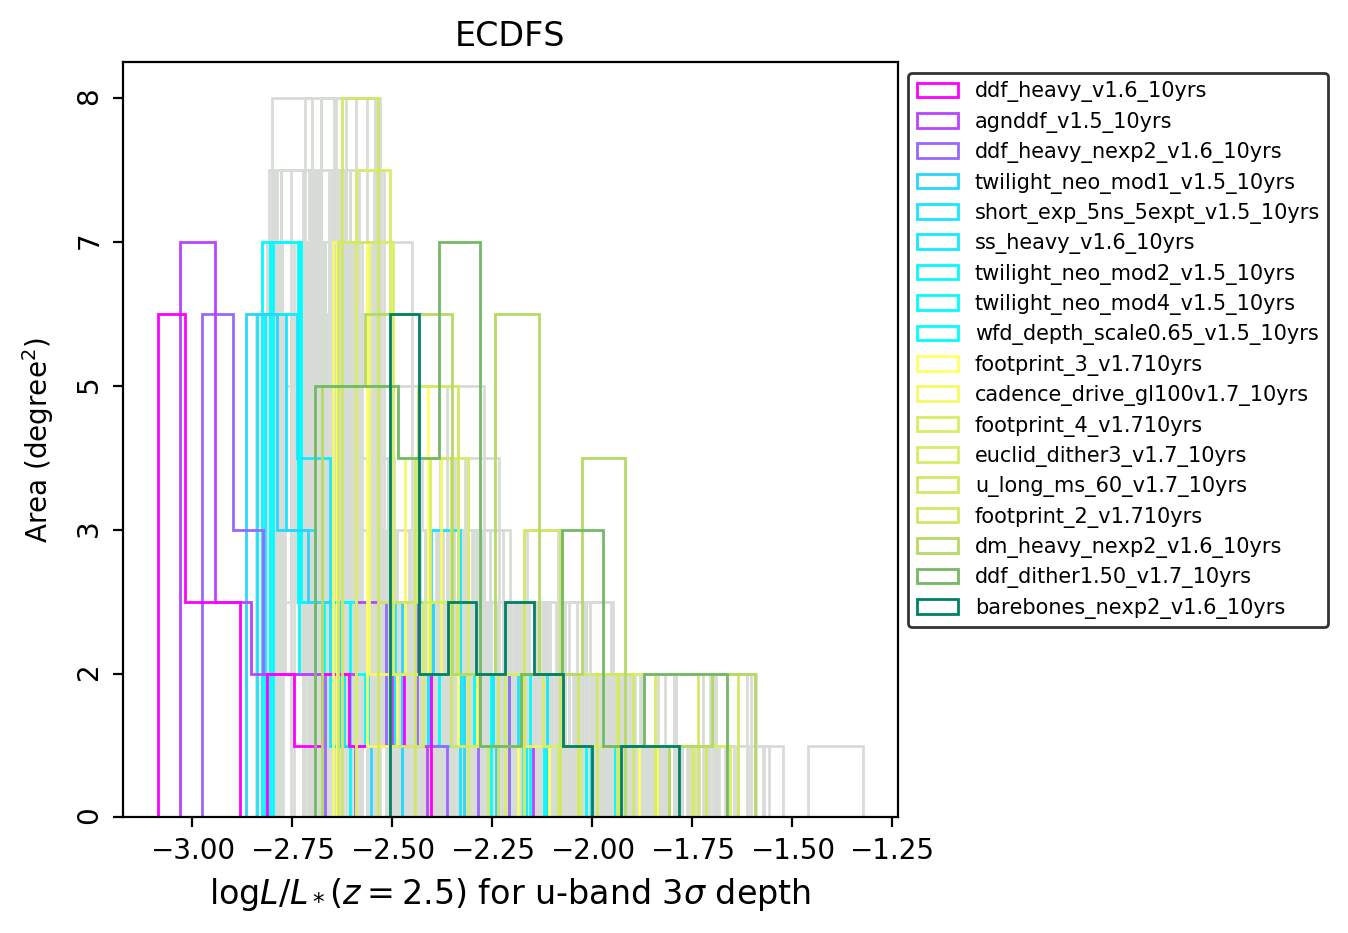

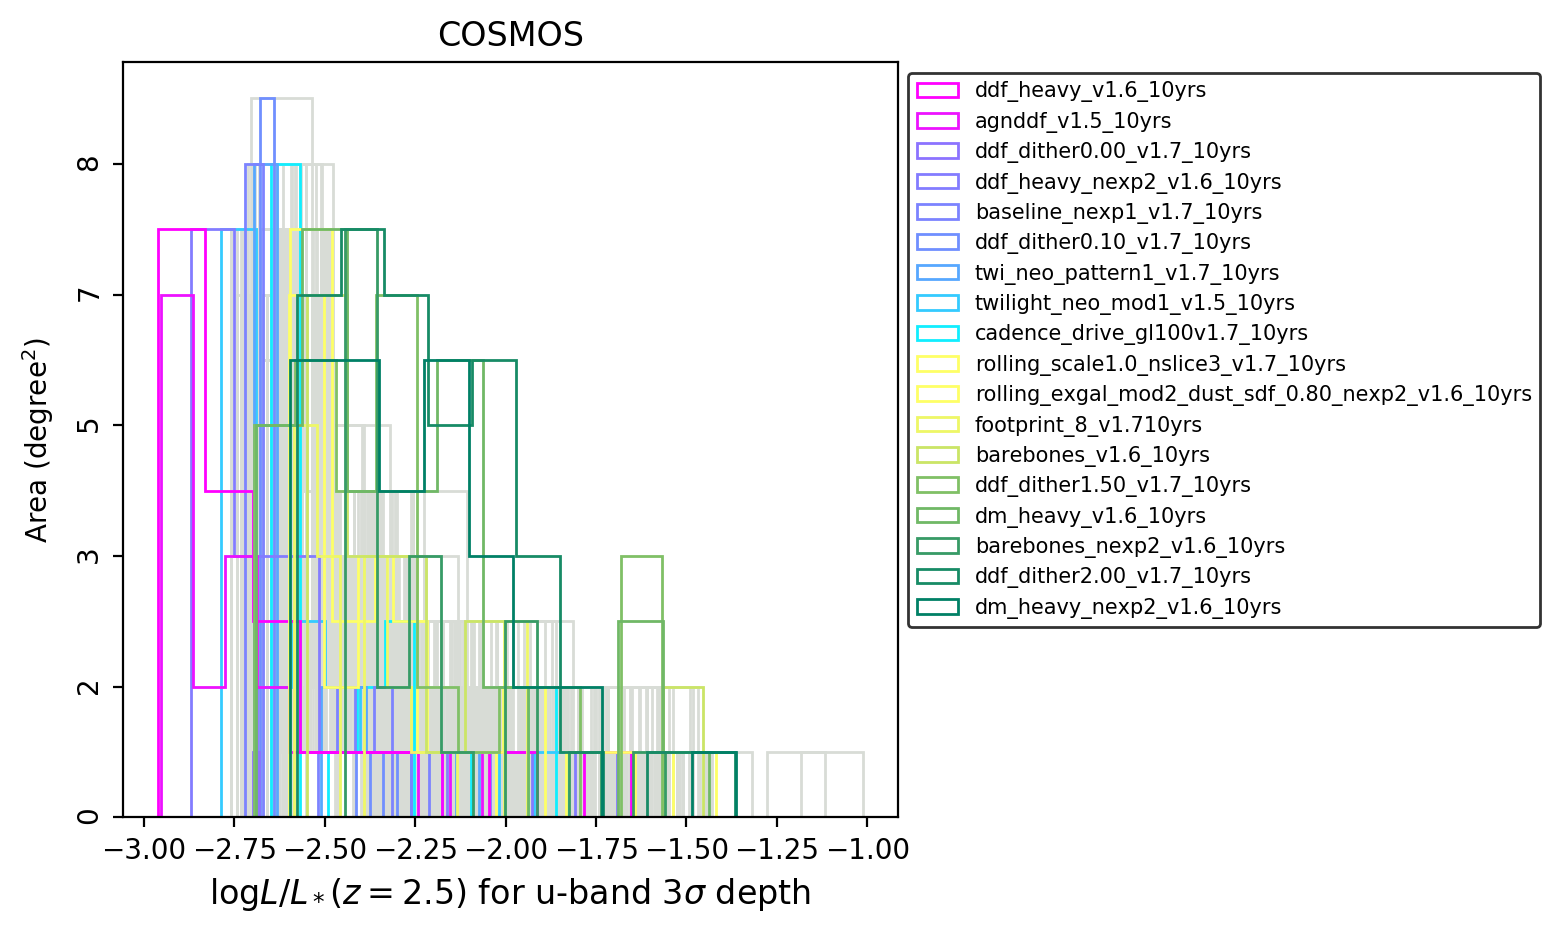

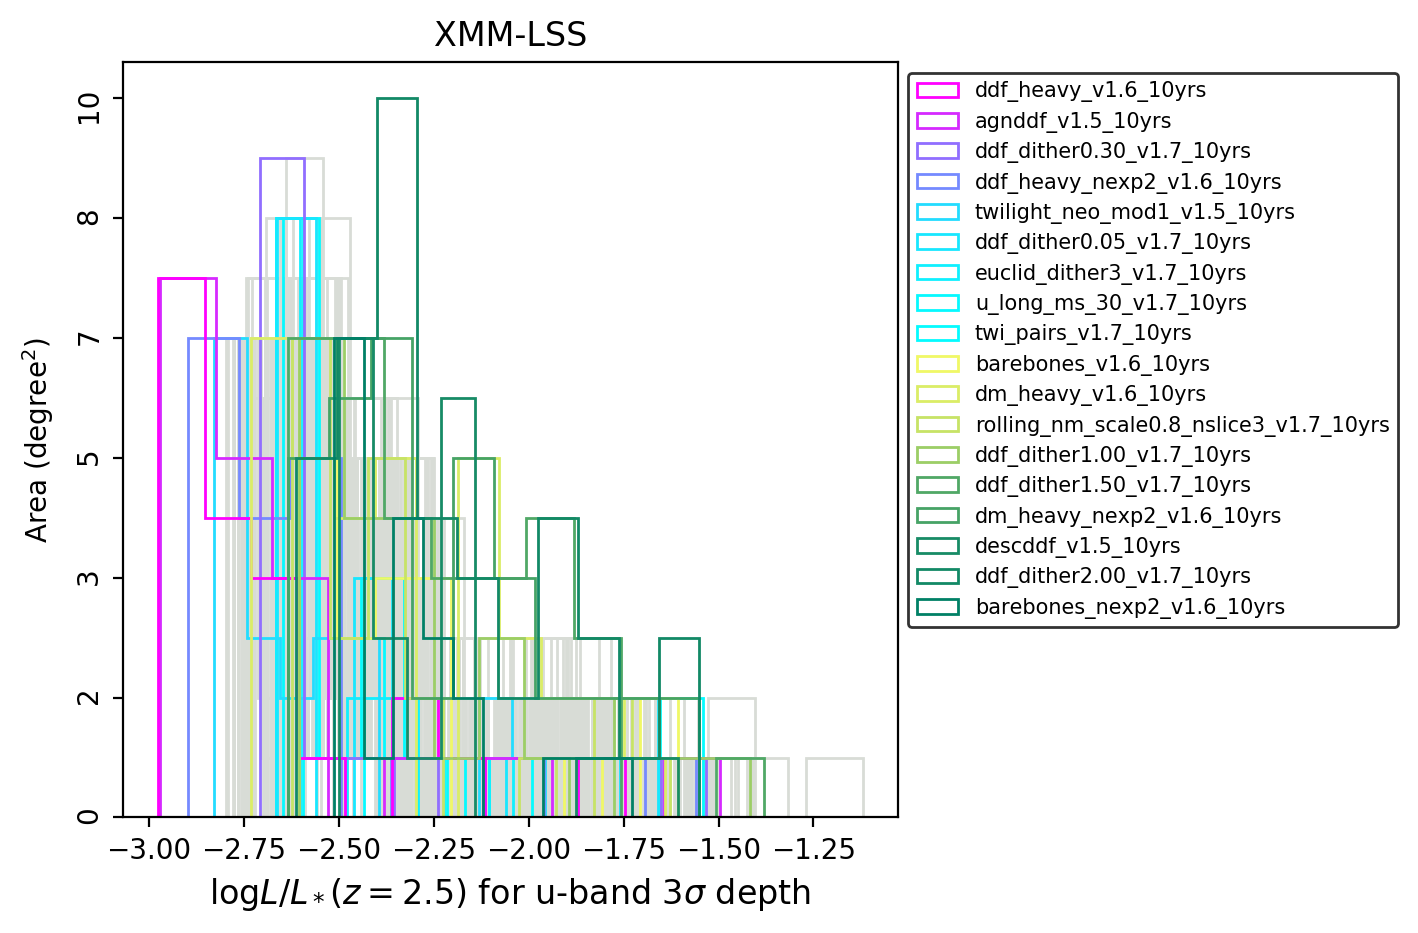

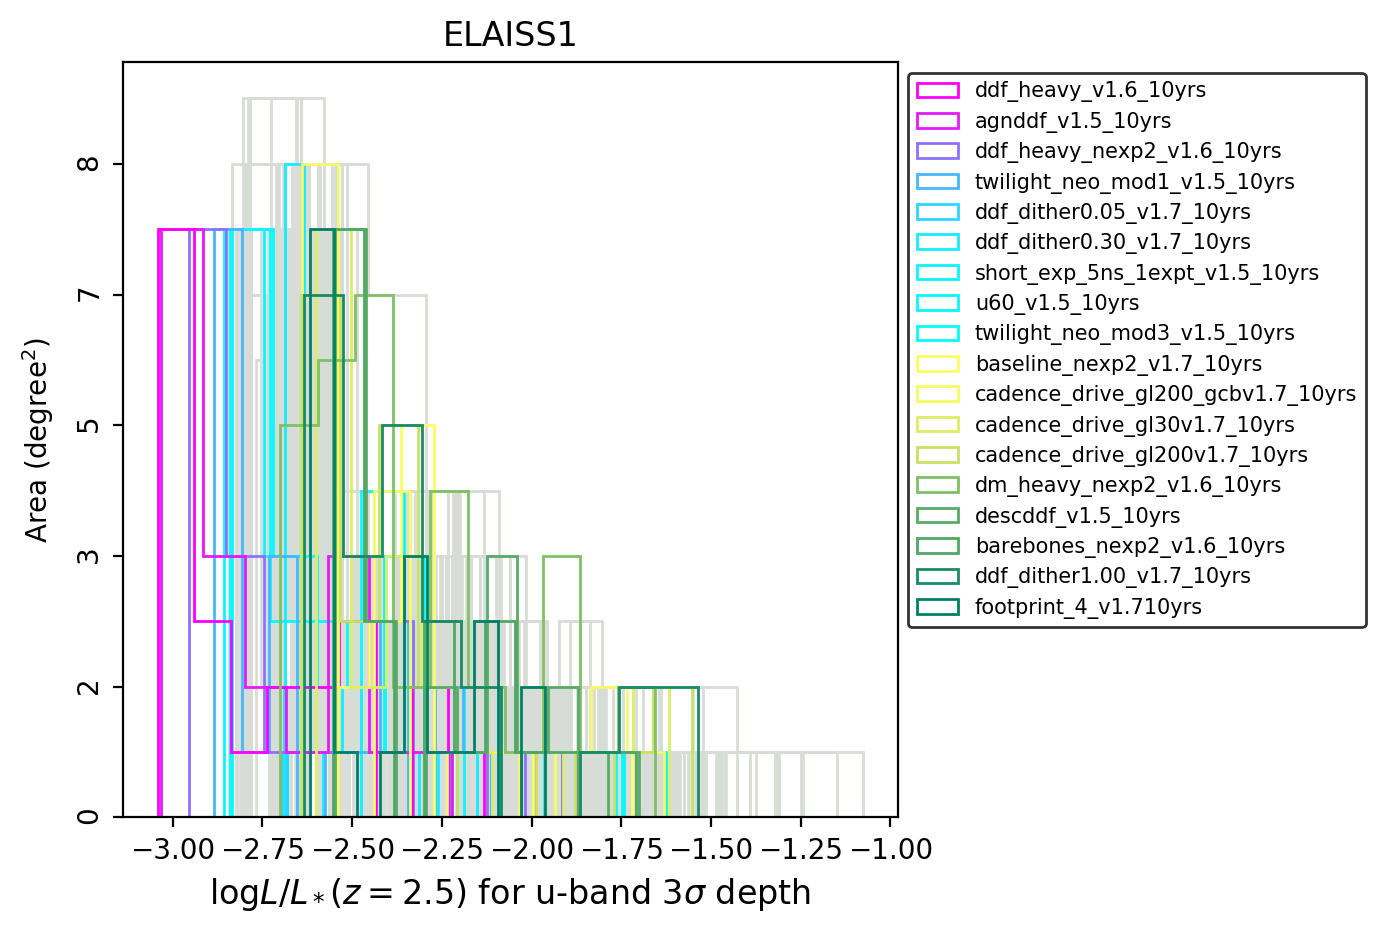

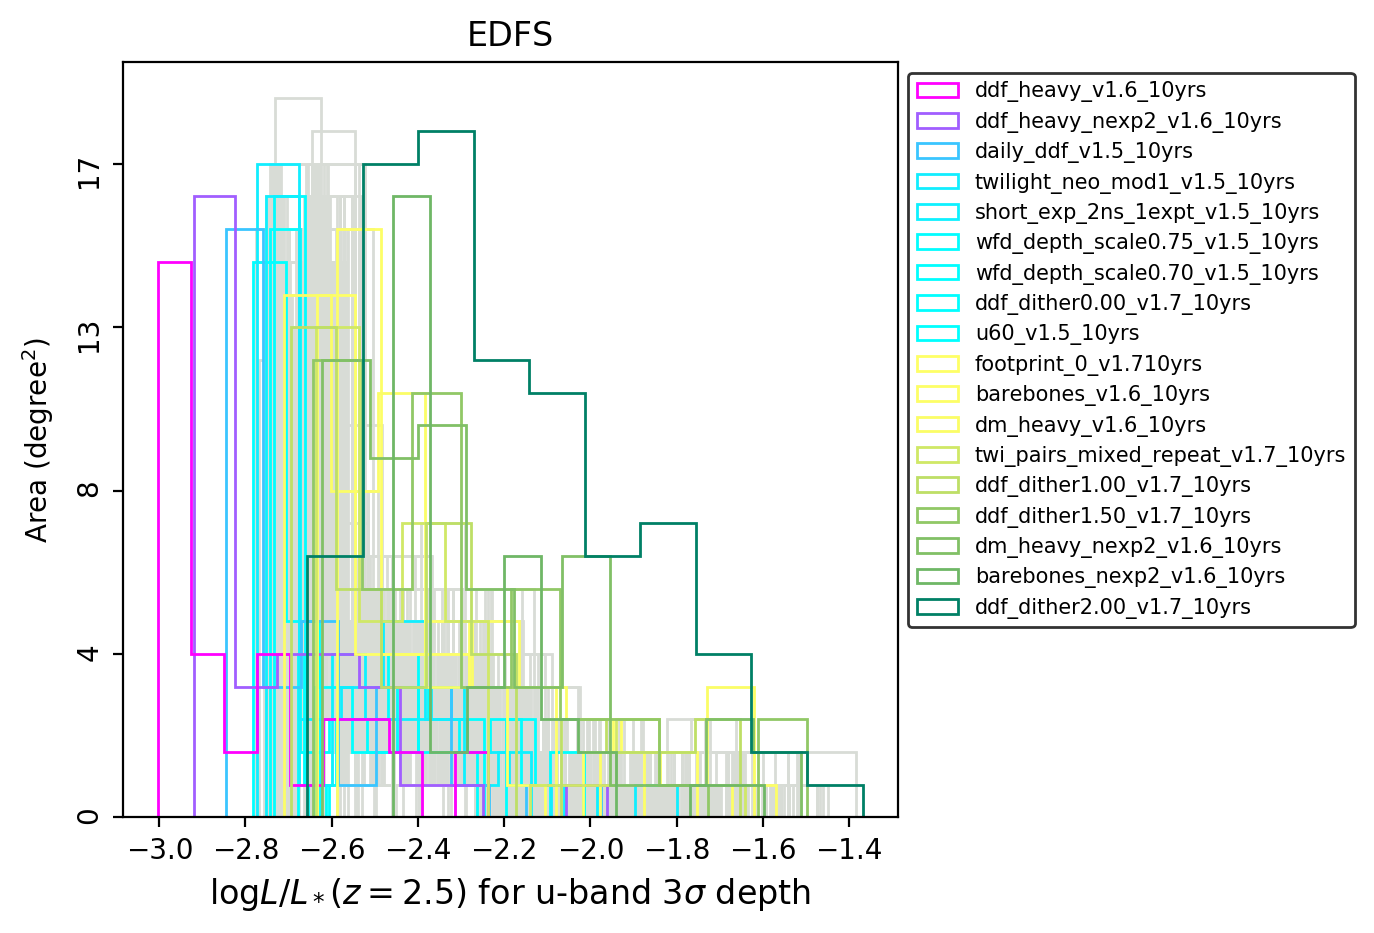

In [16]:
filter = "u"
#DDF = "AllDDFs"
DDFs = ['AllDDFs', 'ECDFS', 'COSMOS', 'XMM-LSS', 'ELAISS1', 'EDFS']

for DDF in DDFs:

    #Create the bundleDict appropriate for this DDF.
    Key = tuple()
    bundleDicts_use = dict()
    Key, bundleDicts_use = get_bundleDicts_use(filter, DDF, bundleDicts_raw)

    #Set here the useful parameters for the plot.
    data_func = log_QLF_Lstar_frac_u
    xlabel = r"$\log L/L_*(z=2.5)$ for u-band 3$\sigma$ depth"
    title = DDF
    healpix_pixarea = bundleDicts_use[dbRuns[0]][Key].slicer.pixArea * u.sr

    #Make the plot
    plot_OpSims_hist_extremes(Key, bundleDicts_use, data_func=data_func, 
                              color_map_top=mpl.cm.summer_r, 
                              color_map_bottom=mpl.cm.cool_r, xlabel=xlabel, 
                              healpix_pixarea=healpix_pixarea, 
                              figsize=(5, 5), title=title, bins=10, 
                              percentile=5)

    #plot_OpSims_hist(Key, bundleDicts_use, data_func=data_func, figsize=(10,11), 
    #                 healpix_pixarea=healpix_pixarea, datamin=None, datamax=None, 
    #                 color_map=[mpl.cm.summer,mpl.cm.cool], xlabel=xlabel, title=title,
    #                 bins=10)

    #Save the plot.
    fname = "{0}/uband_3sigma_L_Lstar_{1}.png".format(plots_folder,DDF)
    plt.savefig(fname, dpi=200, bbox_inches='tight')

### g-band 5-sgima

In [17]:
def log_QLF_Lstar_frac_g(mlim_5sigma):
    return -0.4*(mlim_5sigma - mstar['g'])

ddf_heavy_v1.6_10yrs -3.478585948009835
agnddf_v1.5_10yrs -2.8076719098459595
ddf_heavy_v1.6_10yrs -3.5628264905008176
agnddf_v1.5_10yrs -2.8667072632343658
ddf_heavy_v1.6_10yrs -3.4271561802762616
agnddf_v1.5_10yrs -2.7835993505653565
ddf_heavy_v1.6_10yrs -3.4154414358614247
agnddf_v1.5_10yrs -2.7208601251081745
ddf_heavy_v1.6_10yrs -3.489039156854757
agnddf_v1.5_10yrs -2.840650213454012
ddf_heavy_v1.6_10yrs -3.508169380026861
agnddf_v1.5_10yrs -2.841202175735176


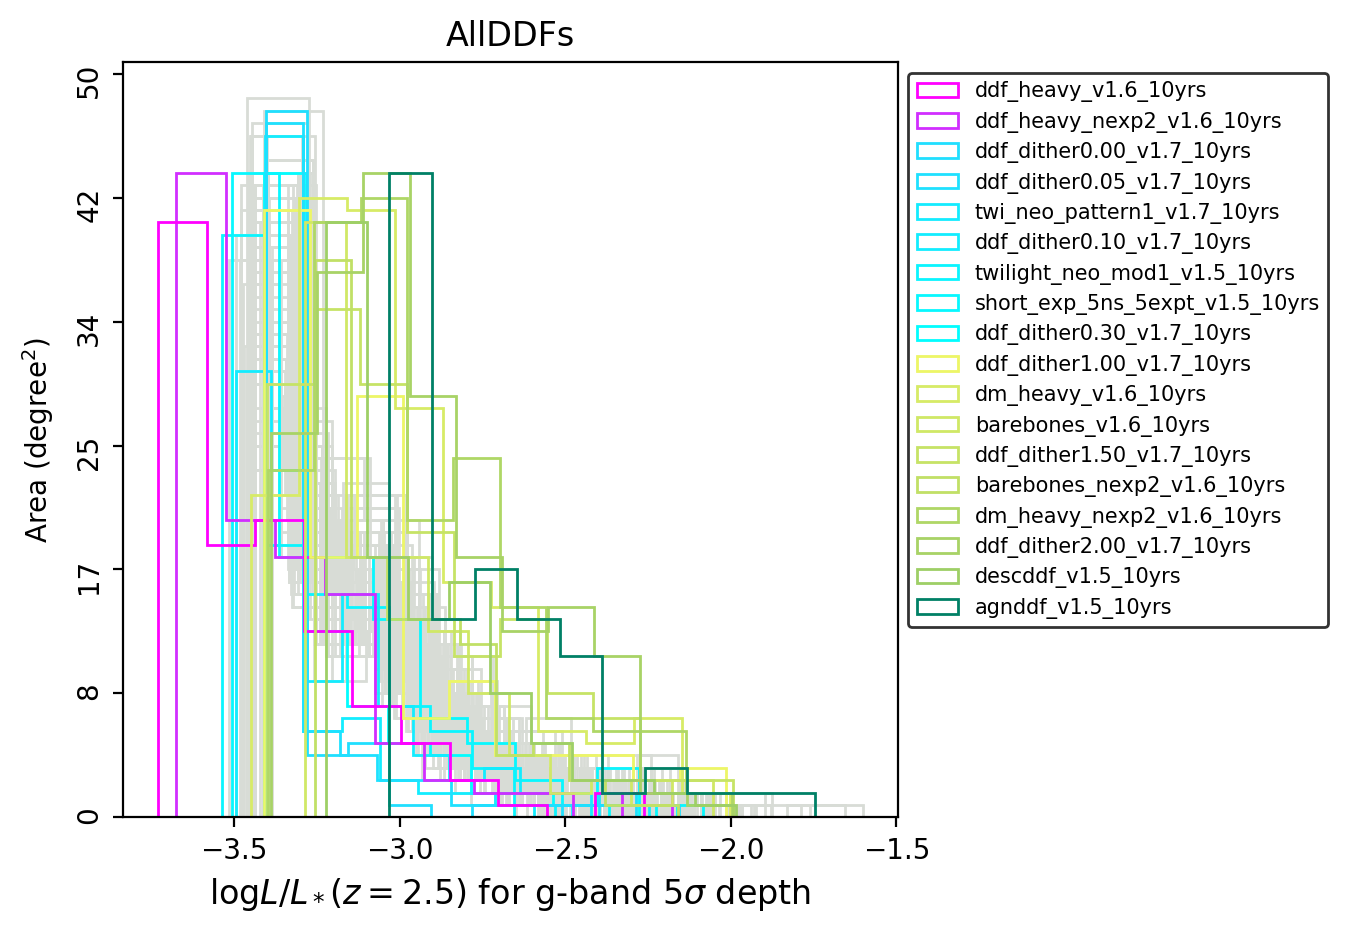

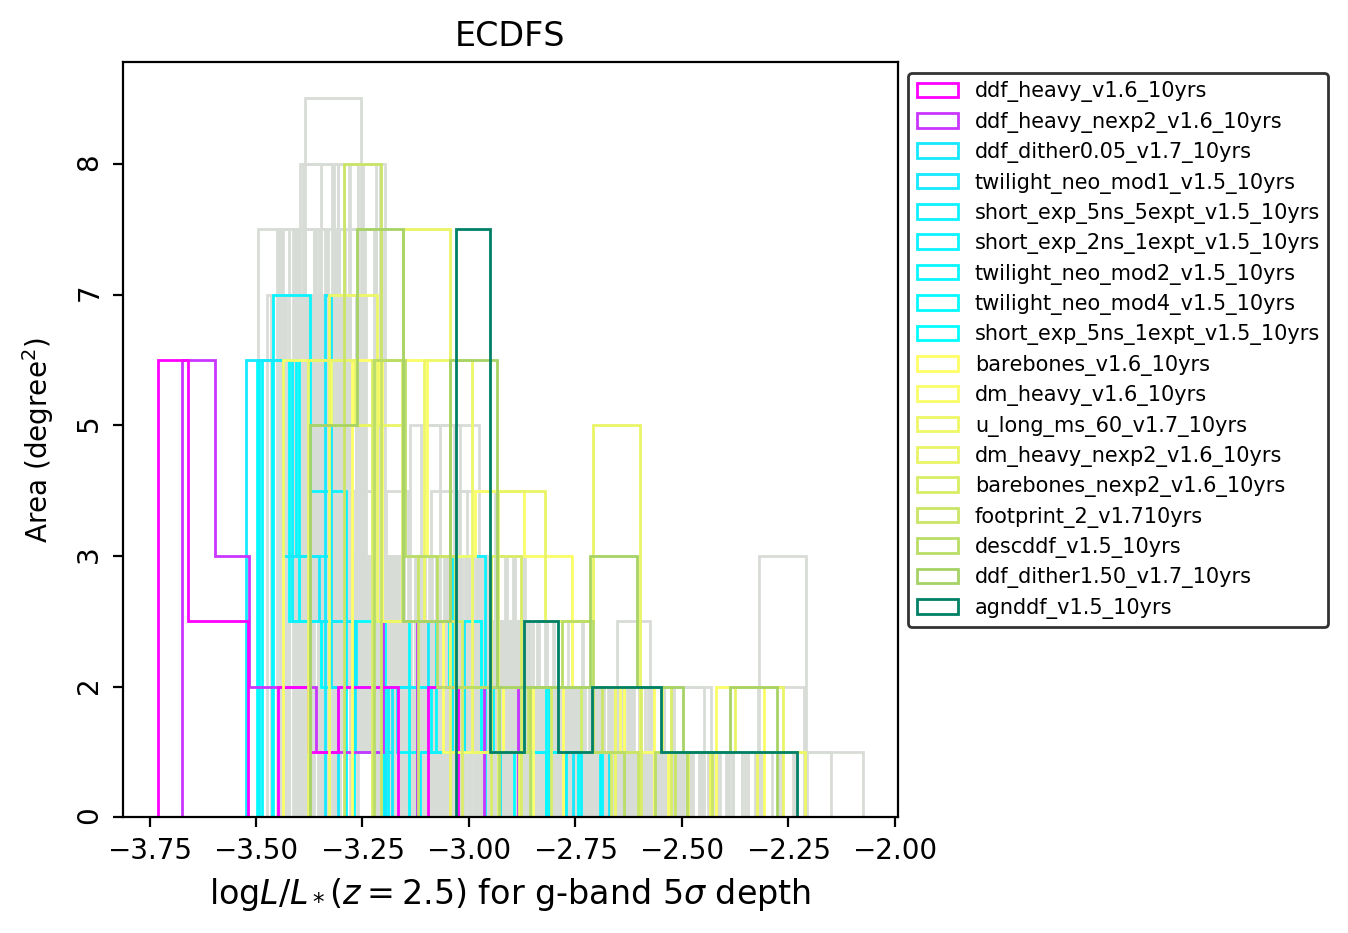

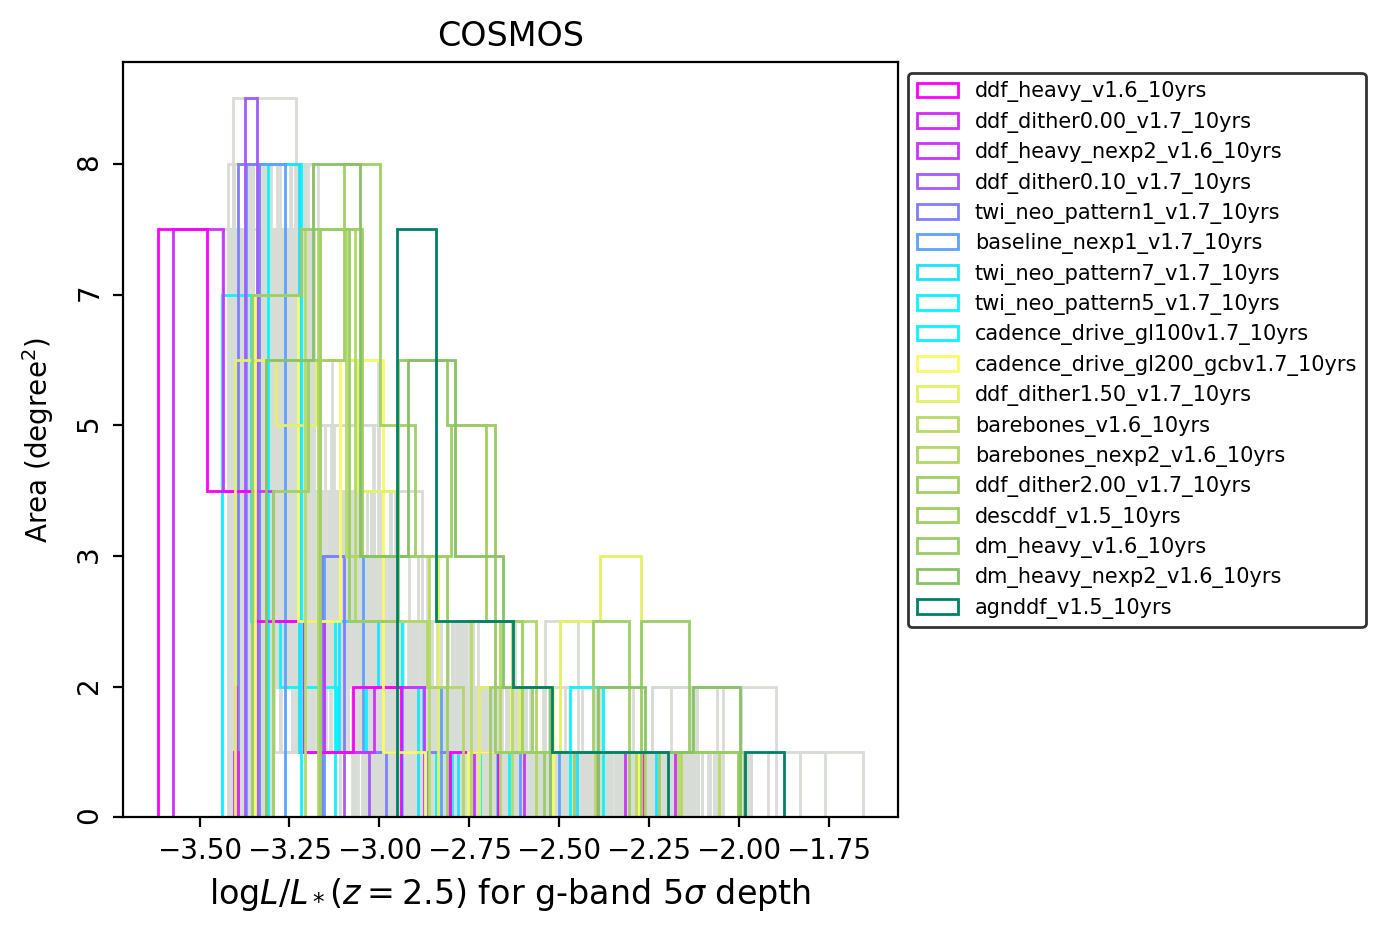

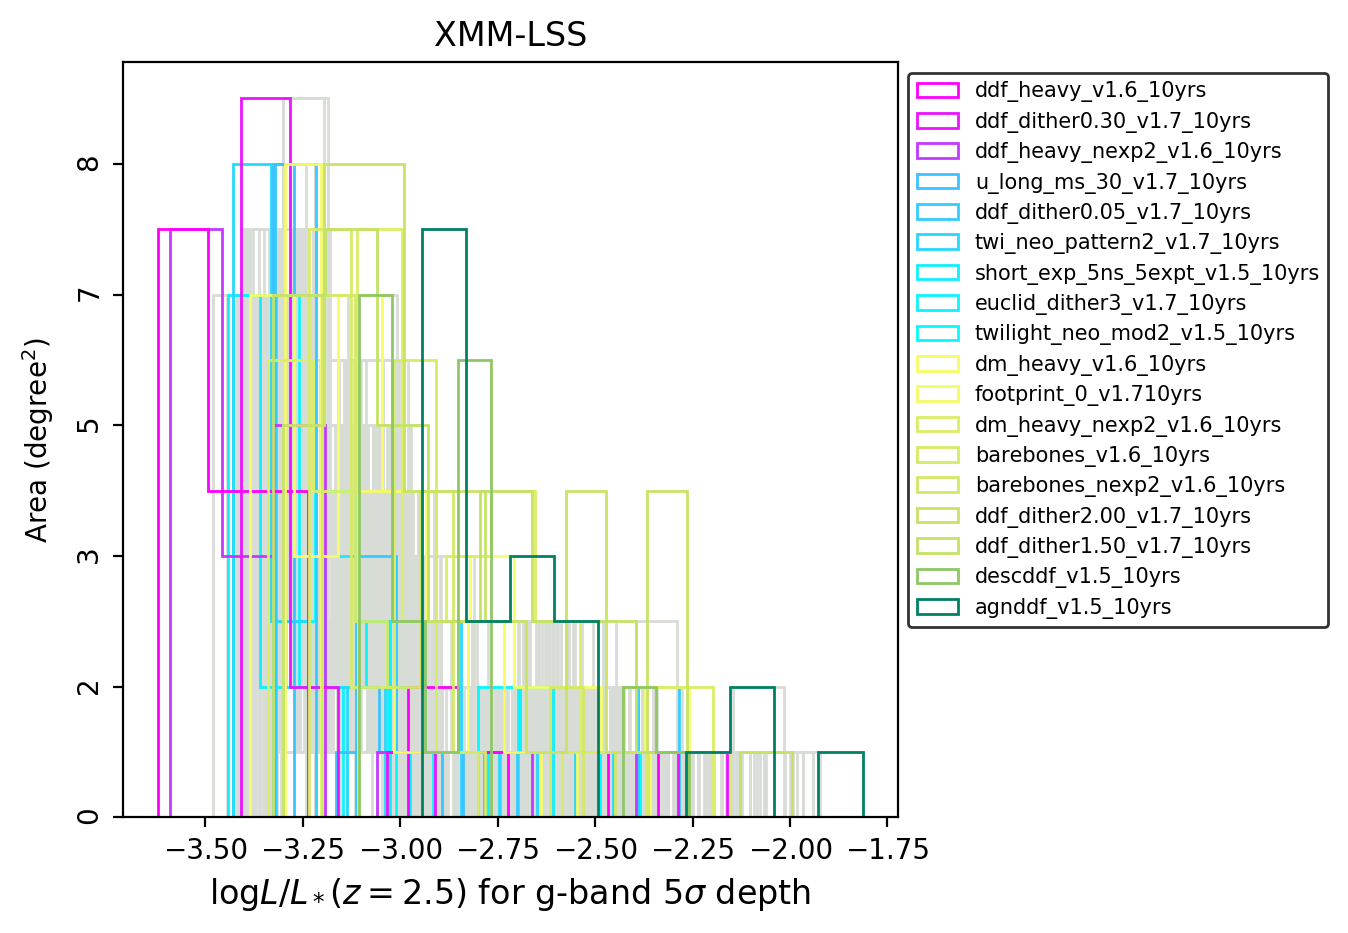

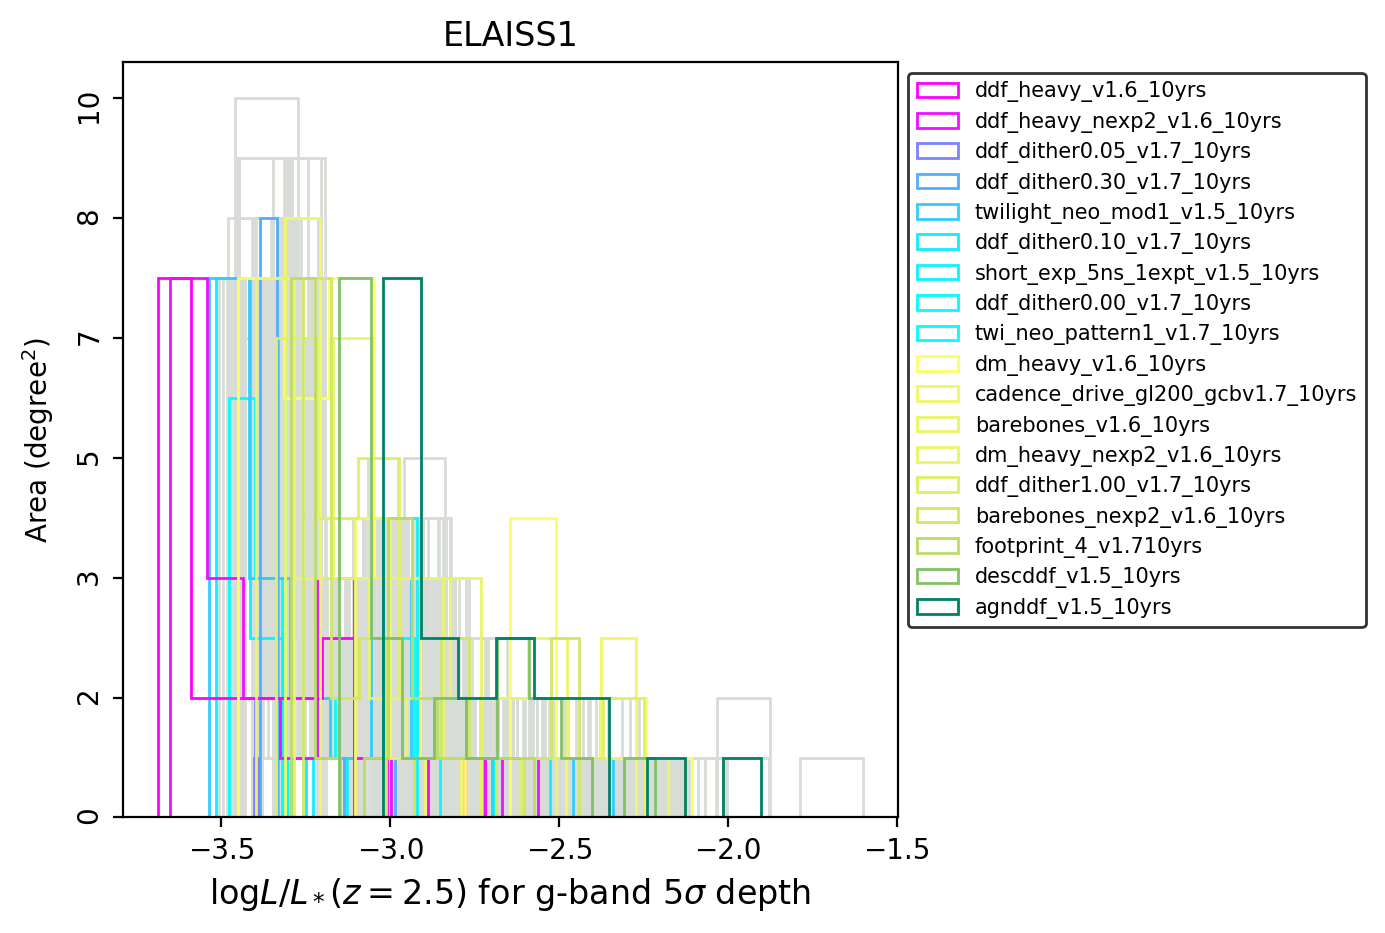

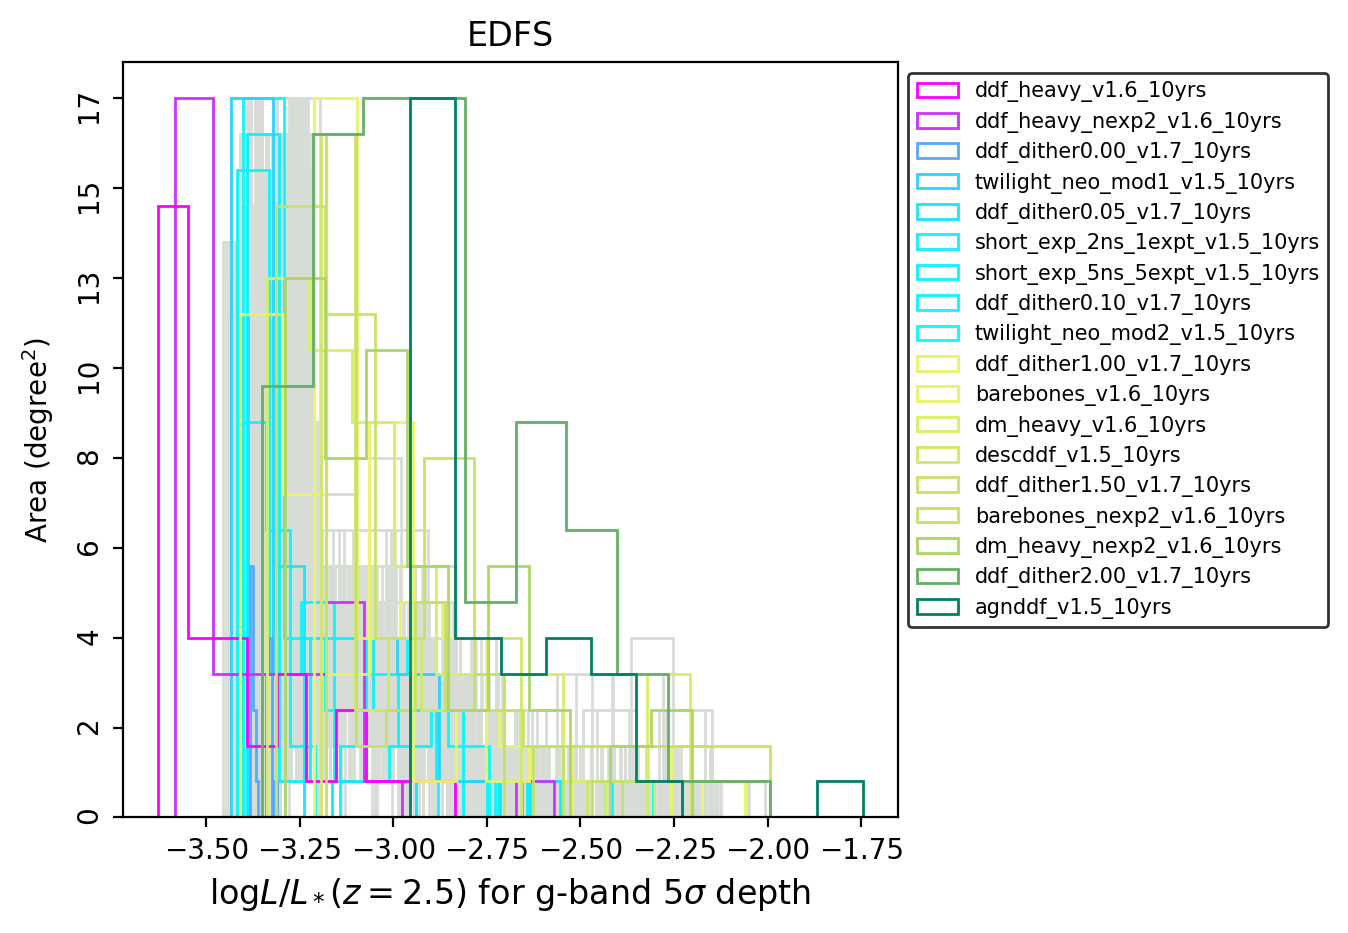

In [18]:
filter = "g"
#DDF = "AllDDFs"
DDFs = ['AllDDFs', 'ECDFS', 'COSMOS', 'XMM-LSS', 'ELAISS1', 'EDFS']

for DDF in DDFs:

    #Create the bundleDict appropriate for this DDF.
    Key = tuple()
    bundleDicts_use = dict()
    Key, bundleDicts_use = get_bundleDicts_use(filter, DDF, bundleDicts_raw)

    #Set here the useful parameters for the plot.
    data_func = log_QLF_Lstar_frac_g
    xlabel = r"$\log L/L_*(z=2.5)$ for g-band 5$\sigma$ depth"
    title = DDF
    healpix_pixarea = bundleDicts_use[dbRuns[0]][Key].slicer.pixArea * u.sr

    #Make the plot
    plot_OpSims_hist_extremes(Key, bundleDicts_use, data_func=data_func, 
                              color_map_top=mpl.cm.summer_r, 
                              color_map_bottom=mpl.cm.cool_r, xlabel=xlabel, 
                              healpix_pixarea=healpix_pixarea, 
                              figsize=(5, 5), title=title, bins=10, 
                              percentile=5)

    #plot_OpSims_hist(Key, bundleDicts_use, data_func=data_func, figsize=(10,11), 
    #                 healpix_pixarea=healpix_pixarea, datamin=None, datamax=None, 
    #                 color_map=[mpl.cm.summer,mpl.cm.cool], xlabel=xlabel, title=title,
    #                 bins=10)

    #Save the plot.
    fname = "{0}/gband_3sigma_L_Lstar_{1}.png".format(plots_folder,DDF)
    plt.savefig(fname, dpi=200, bbox_inches='tight')